In [1]:
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

In [3]:
#pip install holidays

In [4]:
import holidays

In [5]:
indian_holidays = holidays.India(years=[2023, 2024, 2025])

In [6]:
transaction = pd.read_csv('transactions.csv')

In [7]:
train = pd.read_csv('train.csv')

In [8]:
transaction.shape

(2266100, 11)

In [9]:
holidays_df = pd.DataFrame(indian_holidays.items(), columns=['date_holiday', 'holiday_name'])

holidays_df.sort_values('date_holiday', inplace=True)

In [10]:
holidays_df['date_holiday'] = holidays_df['date_holiday'].astype(str).str.strip()

In [11]:
holidays_df['date_holiday'] = holidays_df['date_holiday'].astype(str).str.replace(r'\s+', '', regex=True)

In [12]:
holidays_df['date_holiday'] = pd.to_datetime(holidays_df['date_holiday'], errors='coerce')

In [13]:
print(holidays_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, 31 to 30
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date_holiday  47 non-null     datetime64[ns]
 1   holiday_name  47 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.1+ KB
None


In [14]:
print(holidays_df)

   date_holiday              holiday_name
31   2023-01-26              Republic Day
39   2023-02-18           Maha Shivaratri
38   2023-04-04           Mahavir Jayanti
45   2023-04-07               Good Friday
43   2023-04-22                Id-ul-Fitr
34   2023-05-05            Buddha Purnima
44   2023-06-29                    Bakrid
41   2023-07-29                  Muharram
32   2023-08-15          Independence Day
36   2023-09-07               Janmashtami
42   2023-09-28             Milad-un-Nabi
33   2023-10-02            Gandhi Jayanti
37   2023-10-24                  Dussehra
35   2023-11-12                    Diwali
40   2023-11-27        Guru Nanak Jayanti
46   2023-12-25                 Christmas
0    2024-01-26              Republic Day
8    2024-03-08           Maha Shivaratri
14   2024-03-29               Good Friday
12   2024-04-11                Id-ul-Fitr
7    2024-04-21           Mahavir Jayanti
3    2024-05-23            Buddha Purnima
13   2024-06-17                   

In [15]:
transaction['doj'] = transaction['doj'].astype(str).str.strip()
transaction['doj'] = pd.to_datetime(transaction['doj'],errors='coerce')
transaction['doi'] = transaction['doi'].astype(str).str.strip()
transaction['doi'] = pd.to_datetime(transaction['doi'],errors='coerce')

In [16]:
print(transaction)

               doj        doi  srcid  destid         srcid_region  \
0       2023-03-01 2023-01-30     45      46            Karnataka   
1       2023-03-01 2023-01-30     46      45           Tamil Nadu   
2       2023-03-01 2023-01-30     45      47            Karnataka   
3       2023-03-01 2023-01-30     47      45       Andhra Pradesh   
4       2023-03-01 2023-01-30     46       9           Tamil Nadu   
...            ...        ...    ...     ...                  ...   
2266095 2025-02-28 2025-02-28      2      24  Maharashtra and Goa   
2266096 2025-02-28 2025-02-28     44      45           Tamil Nadu   
2266097 2025-02-28 2025-02-28     47      10       Andhra Pradesh   
2266098 2025-02-28 2025-02-28     38      36        Rest of North   
2266099 2025-02-28 2025-02-28     19      30       Madhya Pradesh   

               destid_region srcid_tier destid_tier  cumsum_seatcount  \
0                 Tamil Nadu     Tier 1      Tier 1               8.0   
1                  Karnat

In [17]:
train['doj'] = train['doj'].astype(str).str.strip()
train['doj'] = pd.to_datetime(train['doj'],errors='coerce')

In [18]:
print(train)

             doj  srcid  destid  final_seatcount
0     2023-03-01     45      46           2838.0
1     2023-03-01     46      45           2298.0
2     2023-03-01     45      47           2720.0
3     2023-03-01     47      45           2580.0
4     2023-03-01     46       9           4185.0
...          ...    ...     ...              ...
67195 2024-12-31      2      24            800.0
67196 2024-12-31     44      45           1360.0
67197 2024-12-31     47      10            560.0
67198 2024-12-31     38      36            535.0
67199 2024-12-31     19      30           2040.0

[67200 rows x 4 columns]


In [19]:
train_combined = pd.merge(train, holidays_df, left_on='doj', right_on='date_holiday', how='left')

In [20]:
train_combined['weekday_name'] = train_combined['doj'].dt.day_name()
train_combined['date'] = train_combined['doj'].dt.strftime('%Y-%m-%d')
print(train_combined)

             doj  srcid  destid  final_seatcount date_holiday holiday_name  \
0     2023-03-01     45      46           2838.0          NaT          NaN   
1     2023-03-01     46      45           2298.0          NaT          NaN   
2     2023-03-01     45      47           2720.0          NaT          NaN   
3     2023-03-01     47      45           2580.0          NaT          NaN   
4     2023-03-01     46       9           4185.0          NaT          NaN   
...          ...    ...     ...              ...          ...          ...   
67195 2024-12-31      2      24            800.0          NaT          NaN   
67196 2024-12-31     44      45           1360.0          NaT          NaN   
67197 2024-12-31     47      10            560.0          NaT          NaN   
67198 2024-12-31     38      36            535.0          NaT          NaN   
67199 2024-12-31     19      30           2040.0          NaT          NaN   

      weekday_name        date  
0        Wednesday  2023-03-01

In [21]:
import pandas as pd

# ✅ Step 1: Create holiday_map from available holidays
holiday_map = (
    train_combined[['date_holiday', 'holiday_name']]
    .dropna()
    .drop_duplicates()
    .set_index('date_holiday')['holiday_name']
    .to_dict()
)

# ✅ Step 2: Define weekend dates (Friday, Saturday, Sunday)
weekend_dates = set(
    train_combined[train_combined['doj'].dt.weekday.isin([4, 5, 6])]['doj']
)

# ✅ Step 3: Define updated label function
def label_day_type(doj, holiday_map, weekend_dates):
    # 1. Check if the date is a holiday
    if doj in holiday_map:
        return 'Holiday'

    # 2. Check if it's 1-3 days BEFORE a holiday
    for i in range(1, 4):
        if doj + pd.Timedelta(days=i) in holiday_map:
            return f"{i}_days_before"

    # 3. Check if it's 1-3 days AFTER a holiday
    for i in range(1, 4):
        if doj - pd.Timedelta(days=i) in holiday_map:
            return f"{i}_days_after"

    # 4. If it's a weekend (Fri/Sat/Sun)
    if doj.weekday() in [4, 5, 6]:
        return 'Weekend'

    # 5. Otherwise return weekday name
    return doj.day_name()

# ✅ Step 4: Apply the function to label each row
train_combined['holiday_proximity_label'] = train_combined['doj'].apply(
    lambda x: label_day_type(x, holiday_map, weekend_dates)
)


In [22]:
print(train_combined)

             doj  srcid  destid  final_seatcount date_holiday holiday_name  \
0     2023-03-01     45      46           2838.0          NaT          NaN   
1     2023-03-01     46      45           2298.0          NaT          NaN   
2     2023-03-01     45      47           2720.0          NaT          NaN   
3     2023-03-01     47      45           2580.0          NaT          NaN   
4     2023-03-01     46       9           4185.0          NaT          NaN   
...          ...    ...     ...              ...          ...          ...   
67195 2024-12-31      2      24            800.0          NaT          NaN   
67196 2024-12-31     44      45           1360.0          NaT          NaN   
67197 2024-12-31     47      10            560.0          NaT          NaN   
67198 2024-12-31     38      36            535.0          NaT          NaN   
67199 2024-12-31     19      30           2040.0          NaT          NaN   

      weekday_name        date holiday_proximity_label  
0     

In [23]:
def label_day_type_numeric(doj, holiday_map, weekend_dates):
    for offset in range(-3, 4):
        check_date = doj + pd.Timedelta(days=offset)

        # Skip holidays in a different month/year
        if (check_date.month != doj.month) or (check_date.year != doj.year):
            continue

        if check_date in holiday_map:
            if offset == 0:
                return 100  # Exact holiday

            # Weekend holiday proximity (special cases)
            if check_date.weekday() == 5:  # Saturday
                if doj == check_date - pd.Timedelta(days=1):  # Friday
                    return -10
                elif doj == check_date + pd.Timedelta(days=2):  # Monday
                    return 10
            elif check_date.weekday() == 6:  # Sunday
                if doj == check_date - pd.Timedelta(days=2):  # Friday
                    return -10
                elif doj == check_date + pd.Timedelta(days=1):  # Monday
                    return 10

            return offset  # -3 to -1 (before), 1 to 3 (after)

    # Weekend day (Friday/Saturday/Sunday)
    if doj.weekday() in [4, 5, 6]:
        return 200

    # Day before/after weekend
    for offset in [-1, 1]:
        check_date = doj + pd.Timedelta(days=offset)
        if check_date in weekend_dates:
            return 21 if offset == -1 else 22

    return 0  # Normal weekday
train_combined['holiday_proximity_code'] = train_combined['doj'].apply(
    lambda x: label_day_type_numeric(x, holiday_map, weekend_dates)
)


In [24]:
print(train_combined)

             doj  srcid  destid  final_seatcount date_holiday holiday_name  \
0     2023-03-01     45      46           2838.0          NaT          NaN   
1     2023-03-01     46      45           2298.0          NaT          NaN   
2     2023-03-01     45      47           2720.0          NaT          NaN   
3     2023-03-01     47      45           2580.0          NaT          NaN   
4     2023-03-01     46       9           4185.0          NaT          NaN   
...          ...    ...     ...              ...          ...          ...   
67195 2024-12-31      2      24            800.0          NaT          NaN   
67196 2024-12-31     44      45           1360.0          NaT          NaN   
67197 2024-12-31     47      10            560.0          NaT          NaN   
67198 2024-12-31     38      36            535.0          NaT          NaN   
67199 2024-12-31     19      30           2040.0          NaT          NaN   

      weekday_name        date holiday_proximity_label  holiday

In [25]:
train_combined['holiday_proximity_code'].unique()

array([  0,  22, 200,  21,   3,   2,   1, 100,  -1,  -2,  -3, -10,  10])

In [26]:
train_combined['holiday_proximity_label'].unique()

array(['Wednesday', 'Thursday', 'Weekend', 'Monday', 'Tuesday',
       '3_days_before', '2_days_before', '1_days_before', 'Holiday',
       '1_days_after', '2_days_after', '3_days_after'], dtype=object)

In [27]:
print(train_combined.shape)

(67200, 10)


In [28]:
print(train_combined.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67200 entries, 0 to 67199
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   doj                      67200 non-null  datetime64[ns]
 1   srcid                    67200 non-null  int64         
 2   destid                   67200 non-null  int64         
 3   final_seatcount          67200 non-null  float64       
 4   date_holiday             3000 non-null   datetime64[ns]
 5   holiday_name             3000 non-null   object        
 6   weekday_name             67200 non-null  object        
 7   date                     67200 non-null  object        
 8   holiday_proximity_label  67200 non-null  object        
 9   holiday_proximity_code   67200 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 5.1+ MB
None


In [29]:
print(train.shape)

(67200, 4)


In [30]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67200 entries, 0 to 67199
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   doj              67200 non-null  datetime64[ns]
 1   srcid            67200 non-null  int64         
 2   destid           67200 non-null  int64         
 3   final_seatcount  67200 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 2.1 MB
None


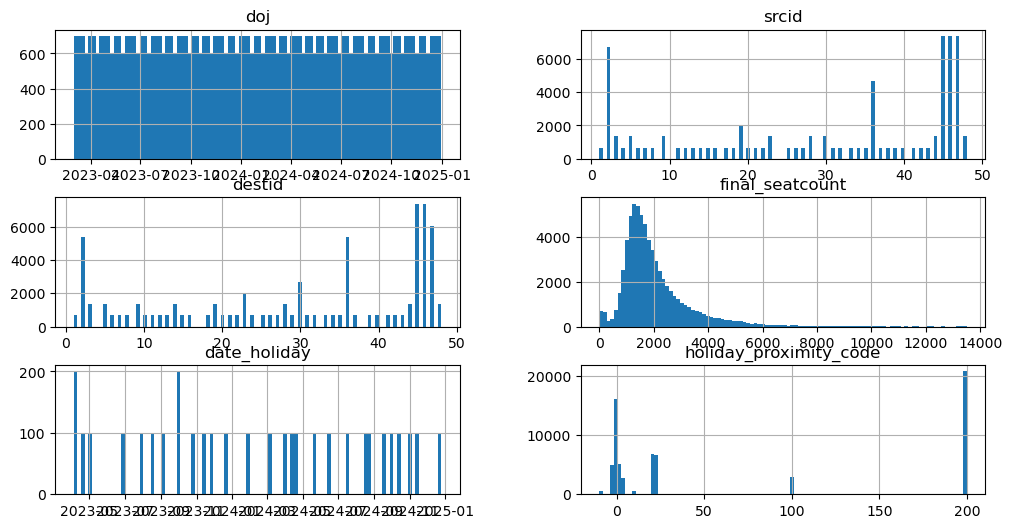

In [31]:
train_combined.hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));

In [32]:
import pandas as pd

# ✅ Holiday map from train_combined
holiday_map = (
    train_combined[['date_holiday', 'holiday_name']]
    .dropna()
    .drop_duplicates()
    .set_index('date_holiday')['holiday_name']
    .to_dict()
)

# ✅ Label function
def label_day_type(doj, holiday_map):
    # Rule 1: If it is a holiday
    if doj in holiday_map:
        return f"Holiday: {holiday_map[doj]}"
    
    # Rule 2: If it is a weekend (Fri=4, Sat=5, Sun=6)
    if doj.weekday() in [4, 5, 6]:
        return "Weekend"
    
    # Rule 3: Check proximity to a holiday (±3 days) — only if NOT weekend or holiday
    for offset in range(1, 4):
        before = doj - pd.Timedelta(days=offset)
        after = doj + pd.Timedelta(days=offset)

        if before in holiday_map and before.weekday() not in [4, 5, 6]:
            return f"{offset}_days_before: {holiday_map[before]}"
        if after in holiday_map and after.weekday() not in [4, 5, 6]:
            return f"{offset}_days_after: {holiday_map[after]}"

    # Rule 4: Default fallback — use weekday name
    return doj.day_name()
train_combined['holiday_proximity_label'] = train_combined['doj'].apply(
    lambda x: label_day_type(x, holiday_map)
)


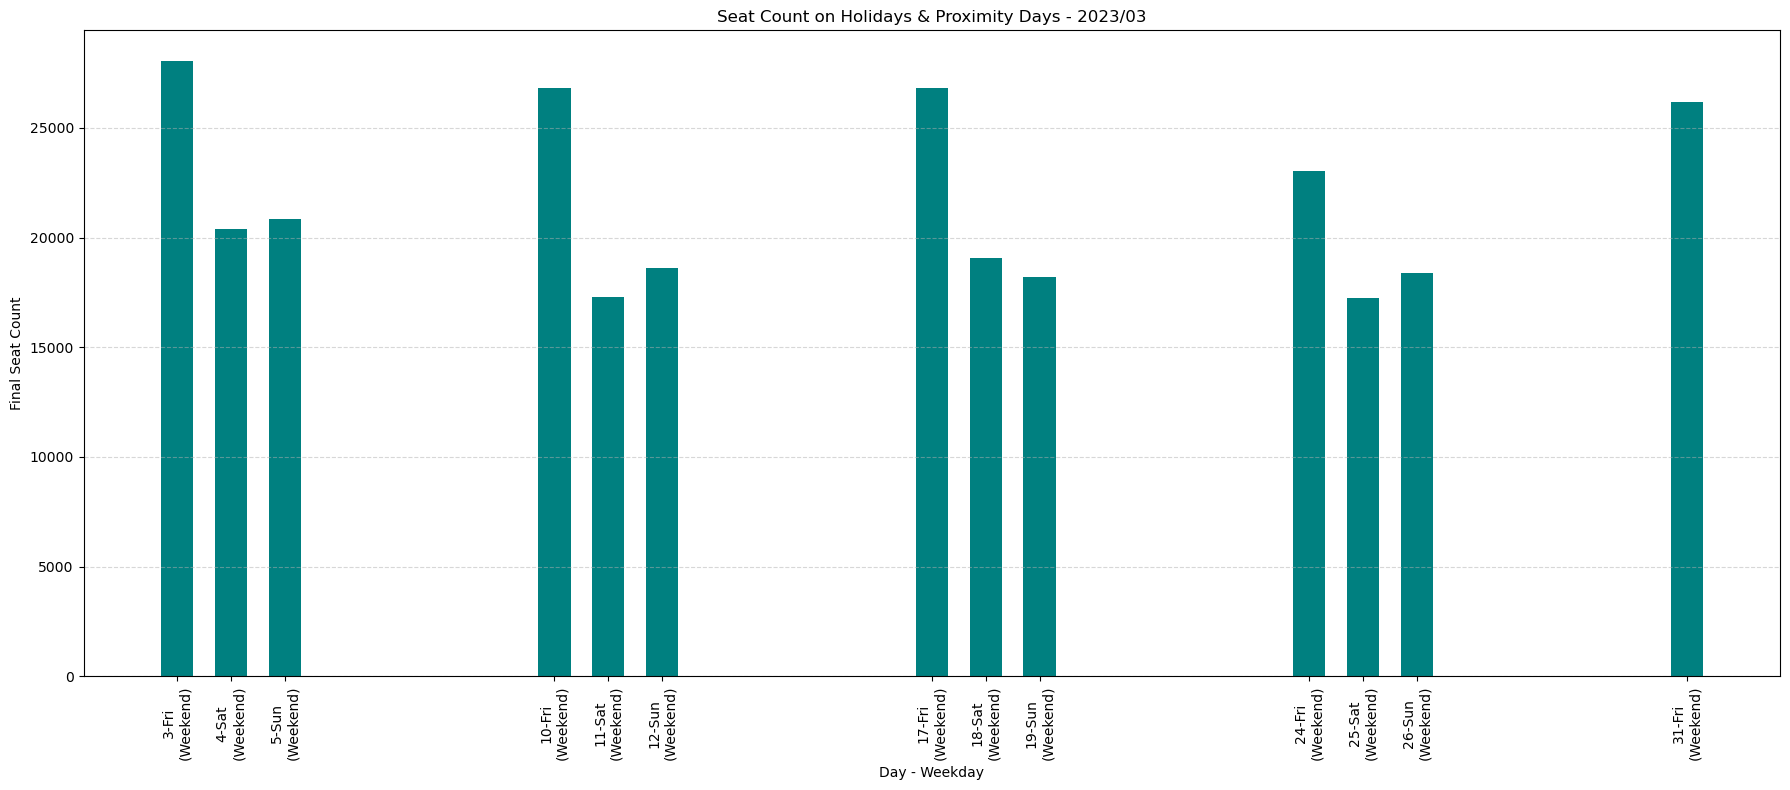

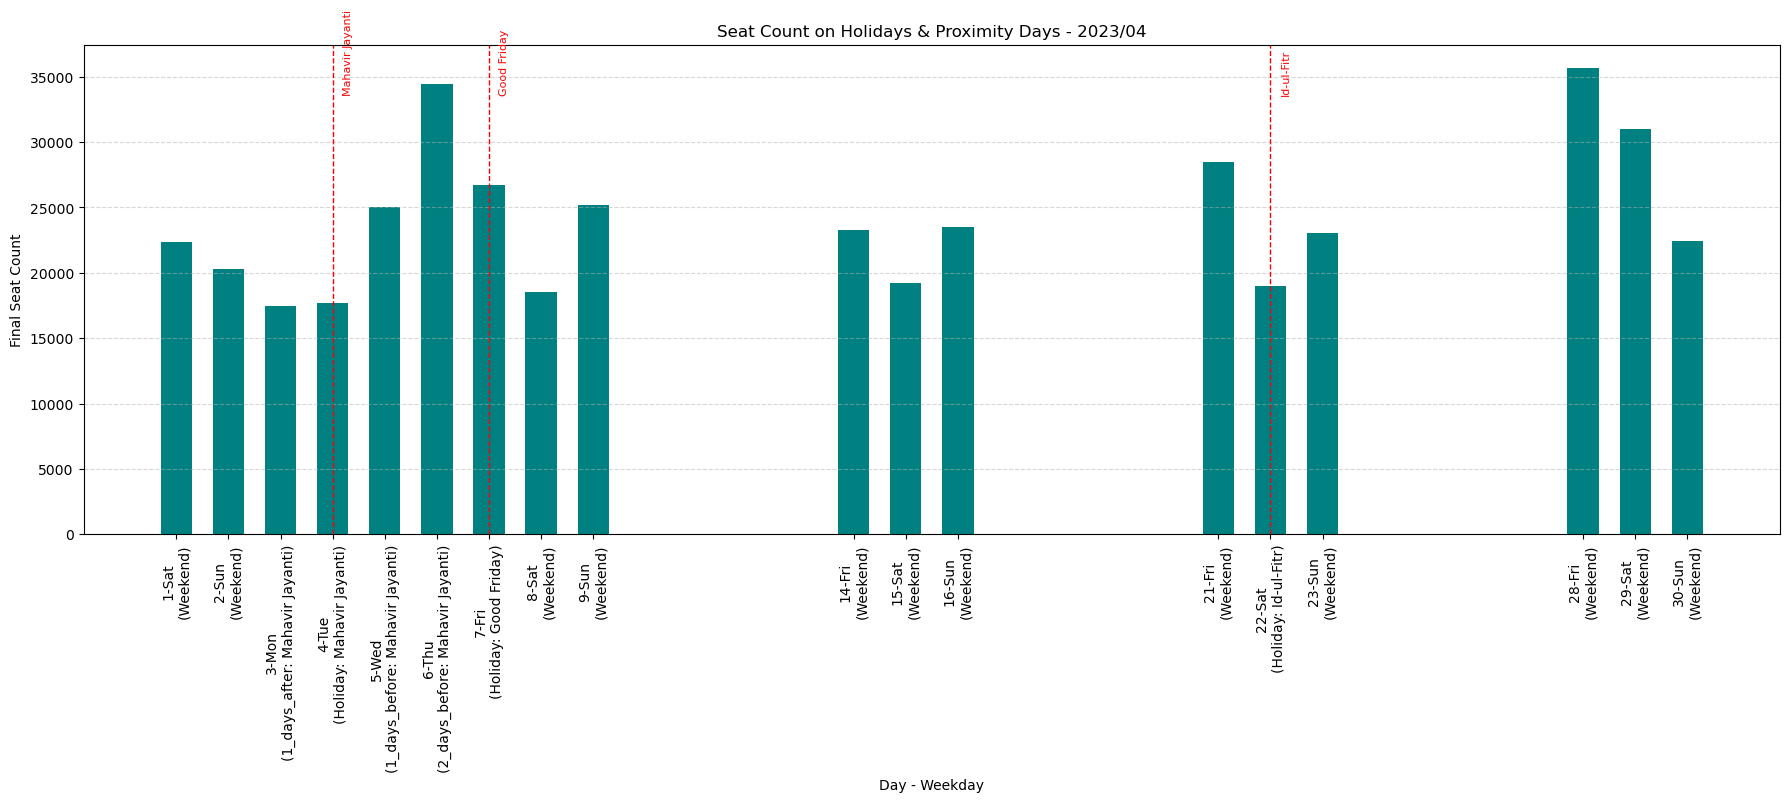

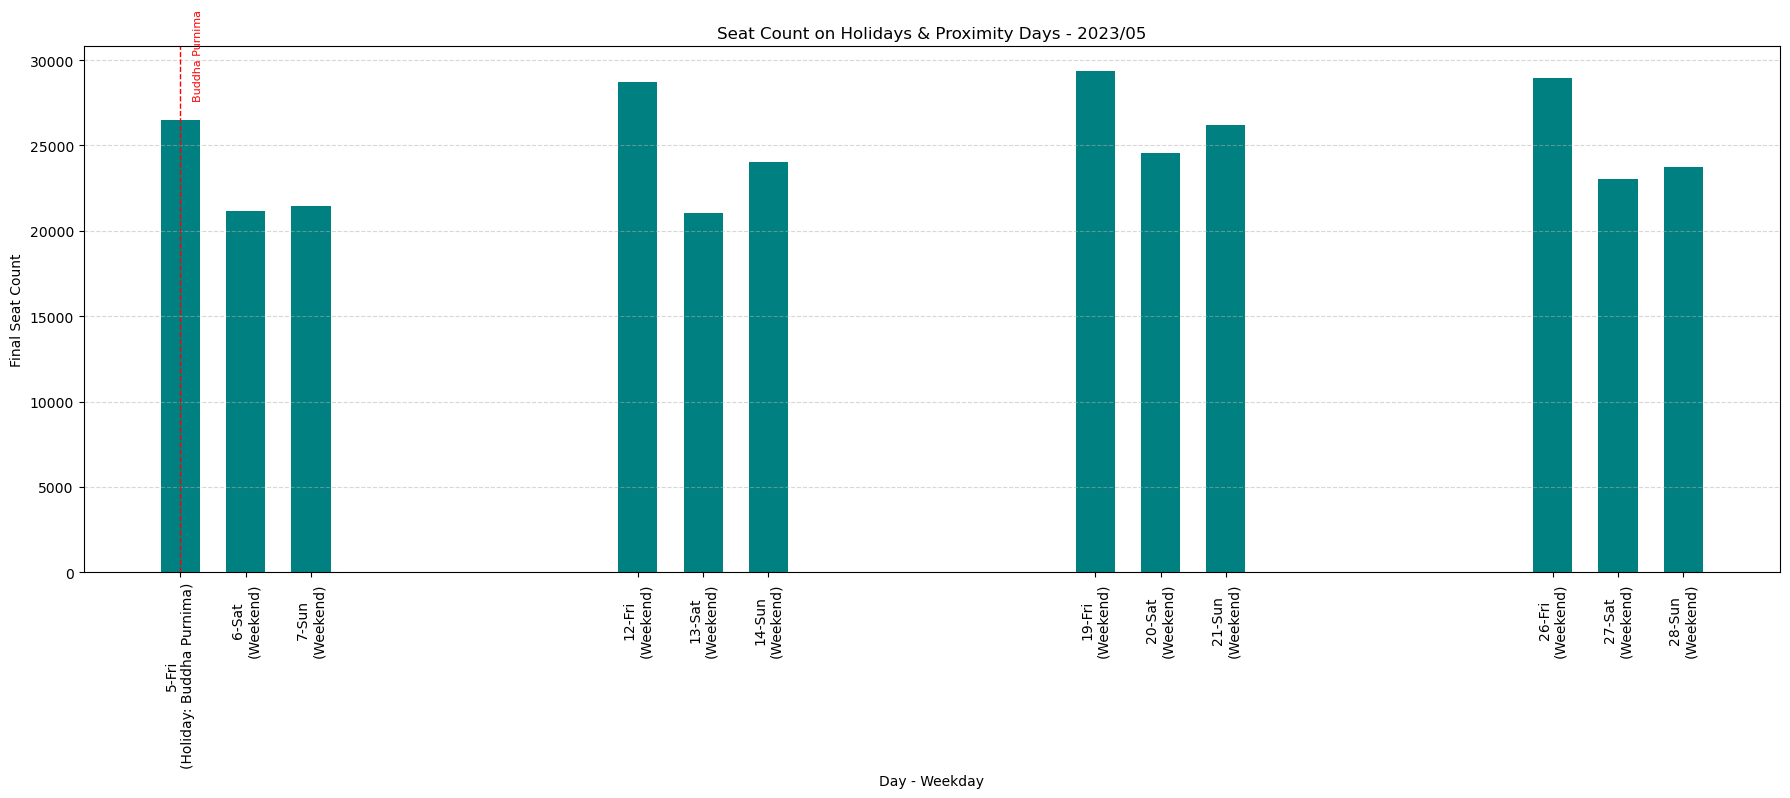

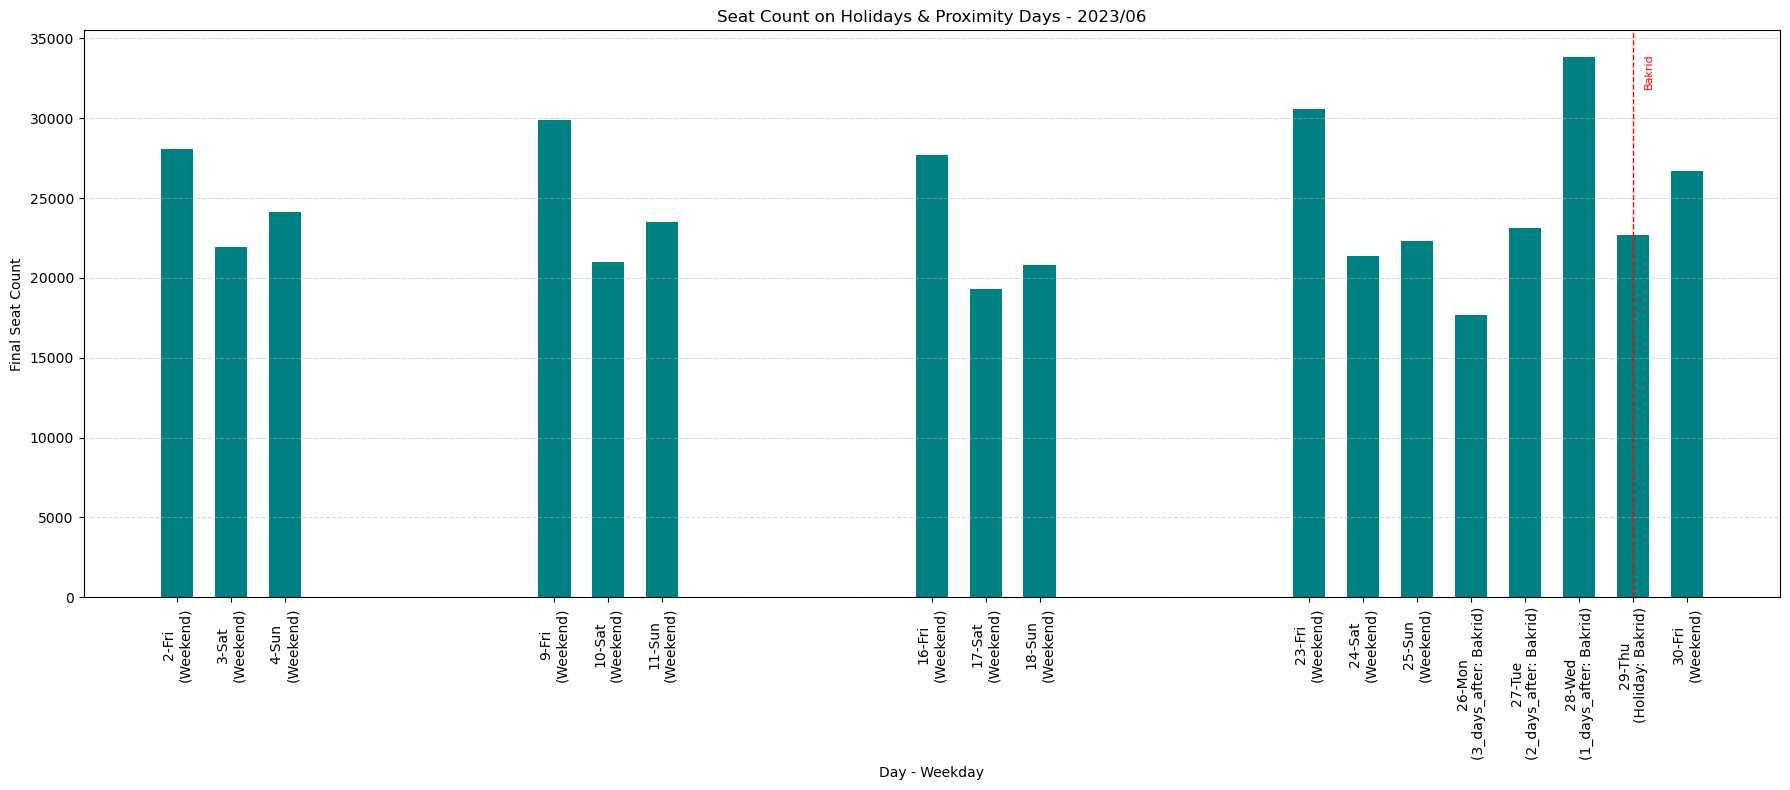

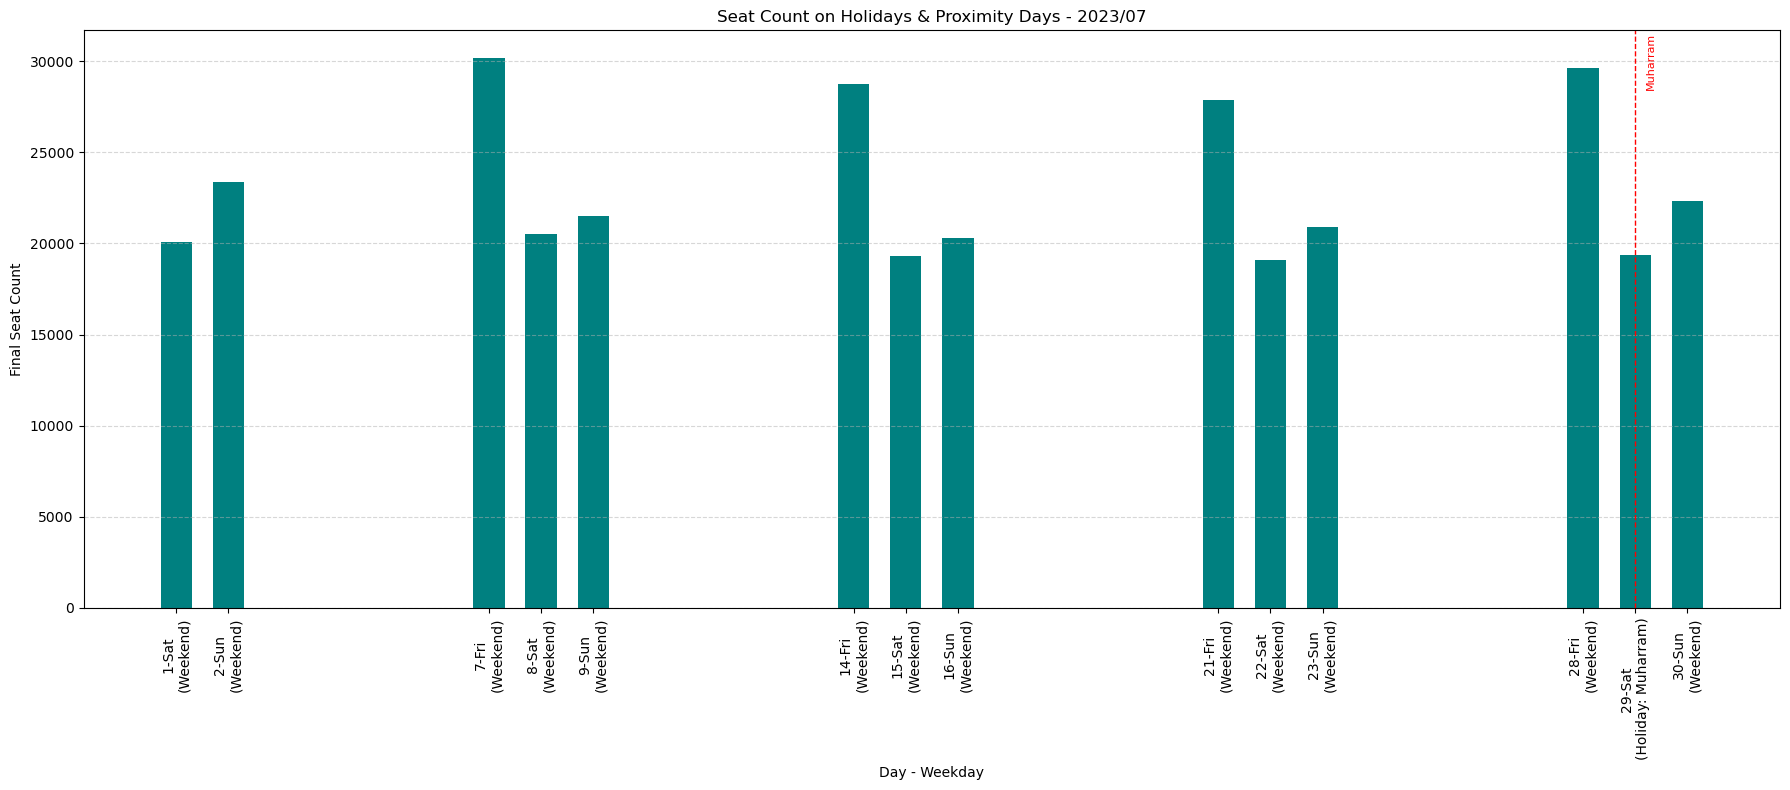

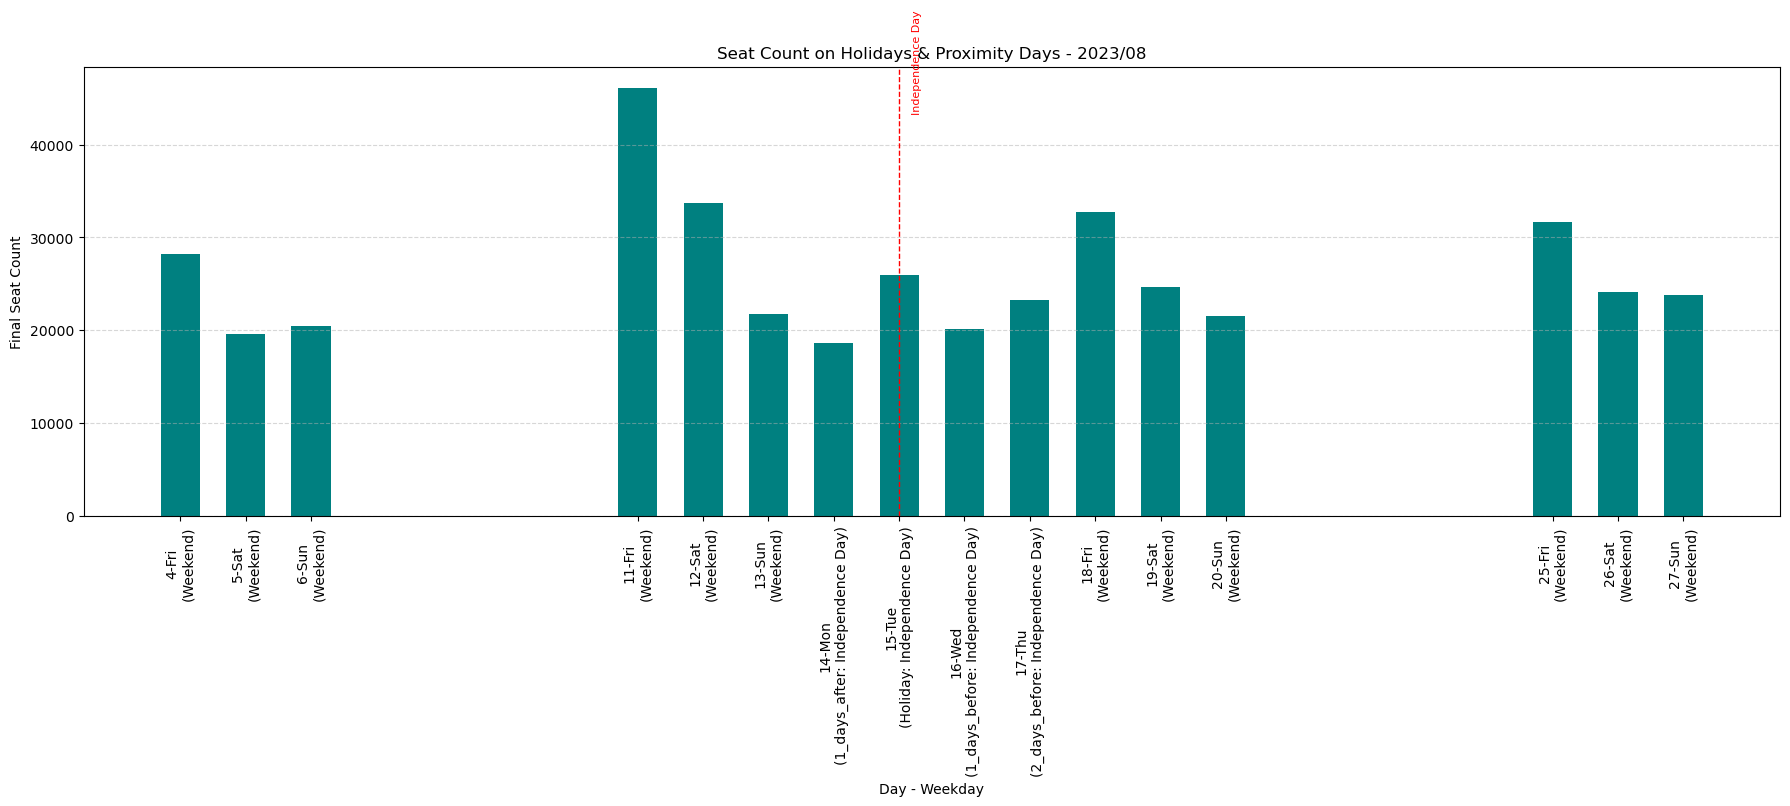

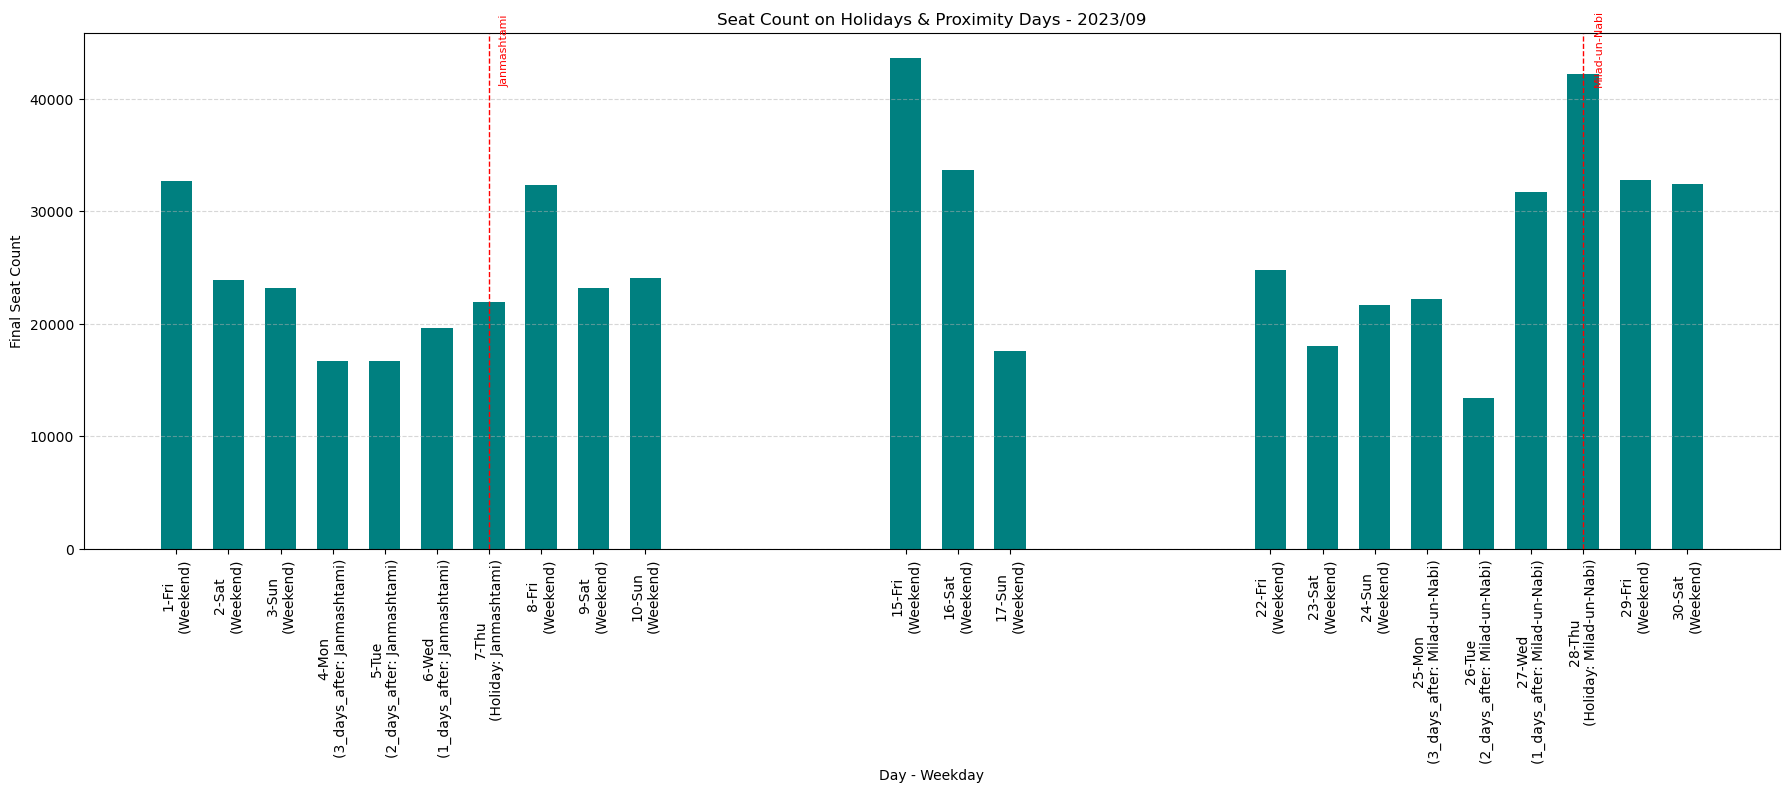

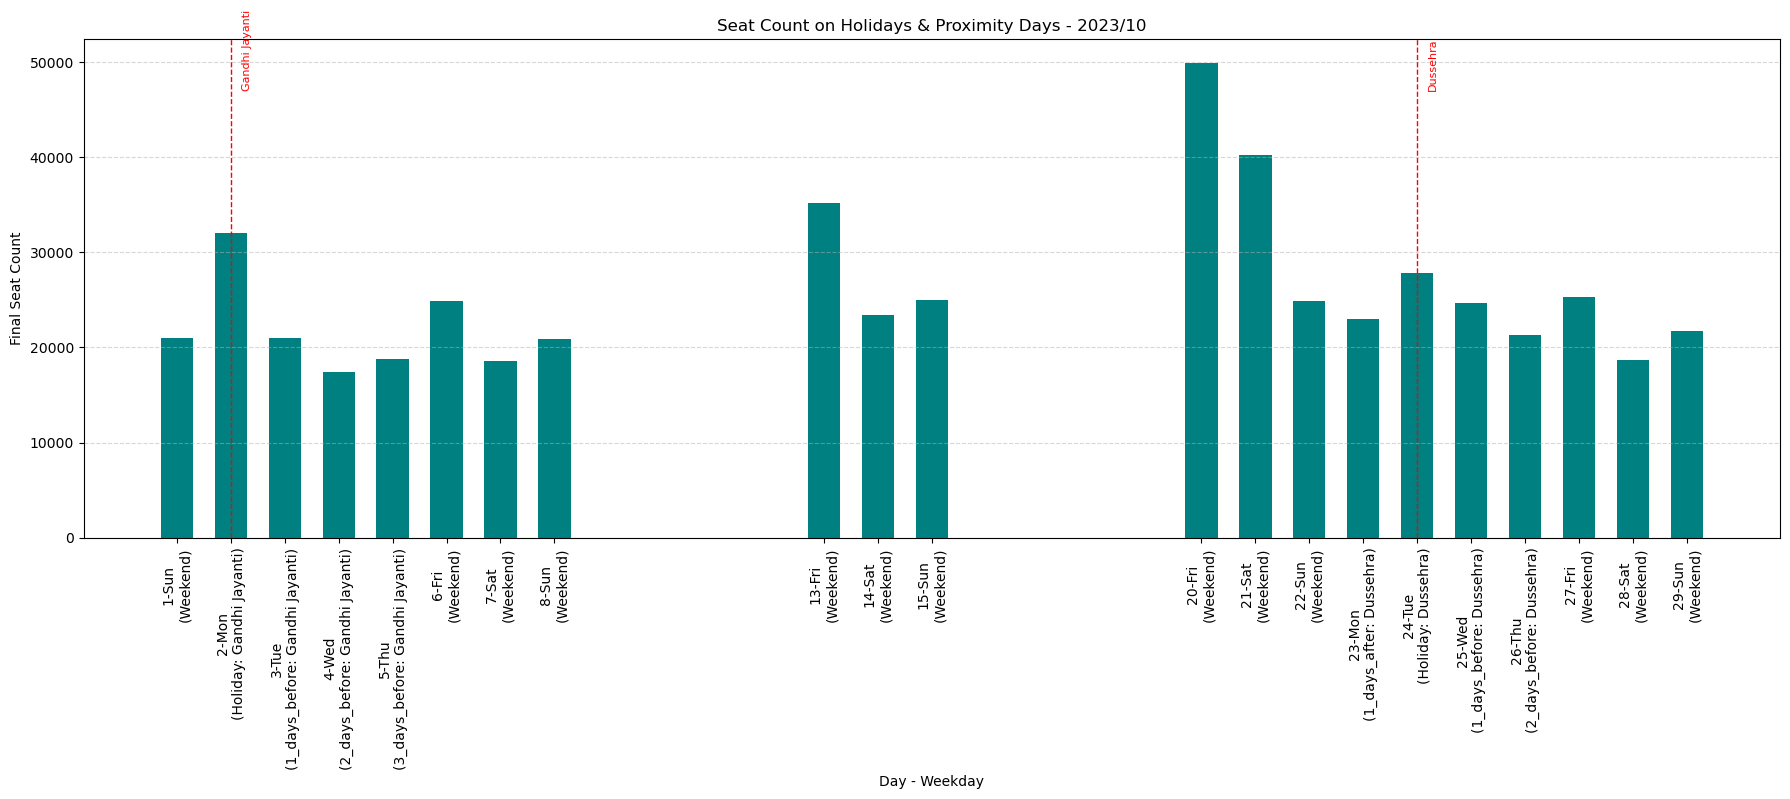

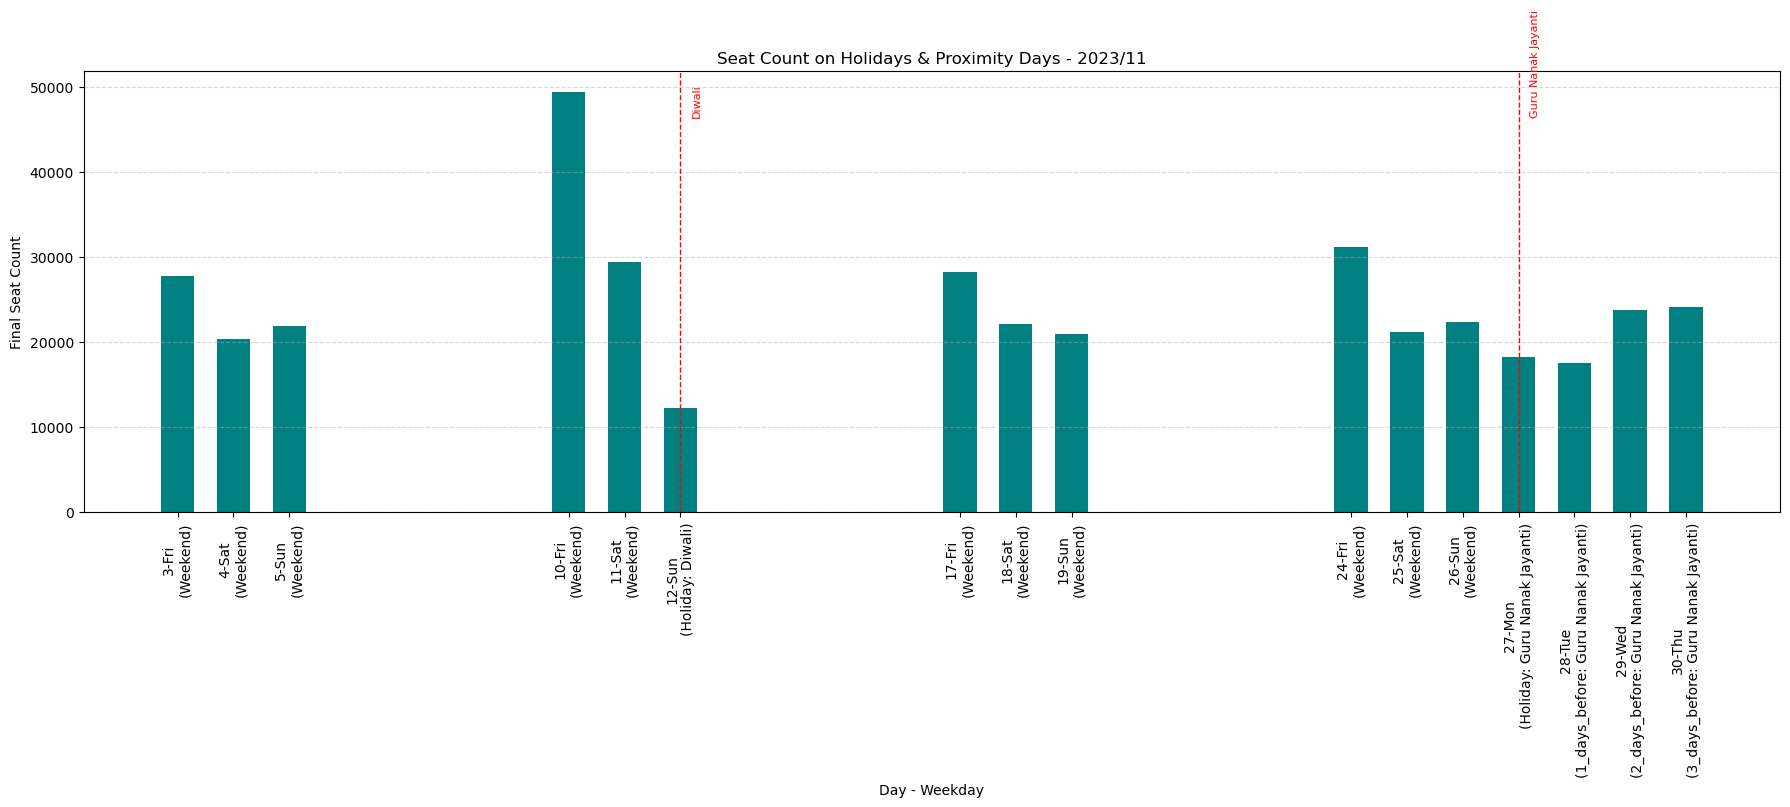

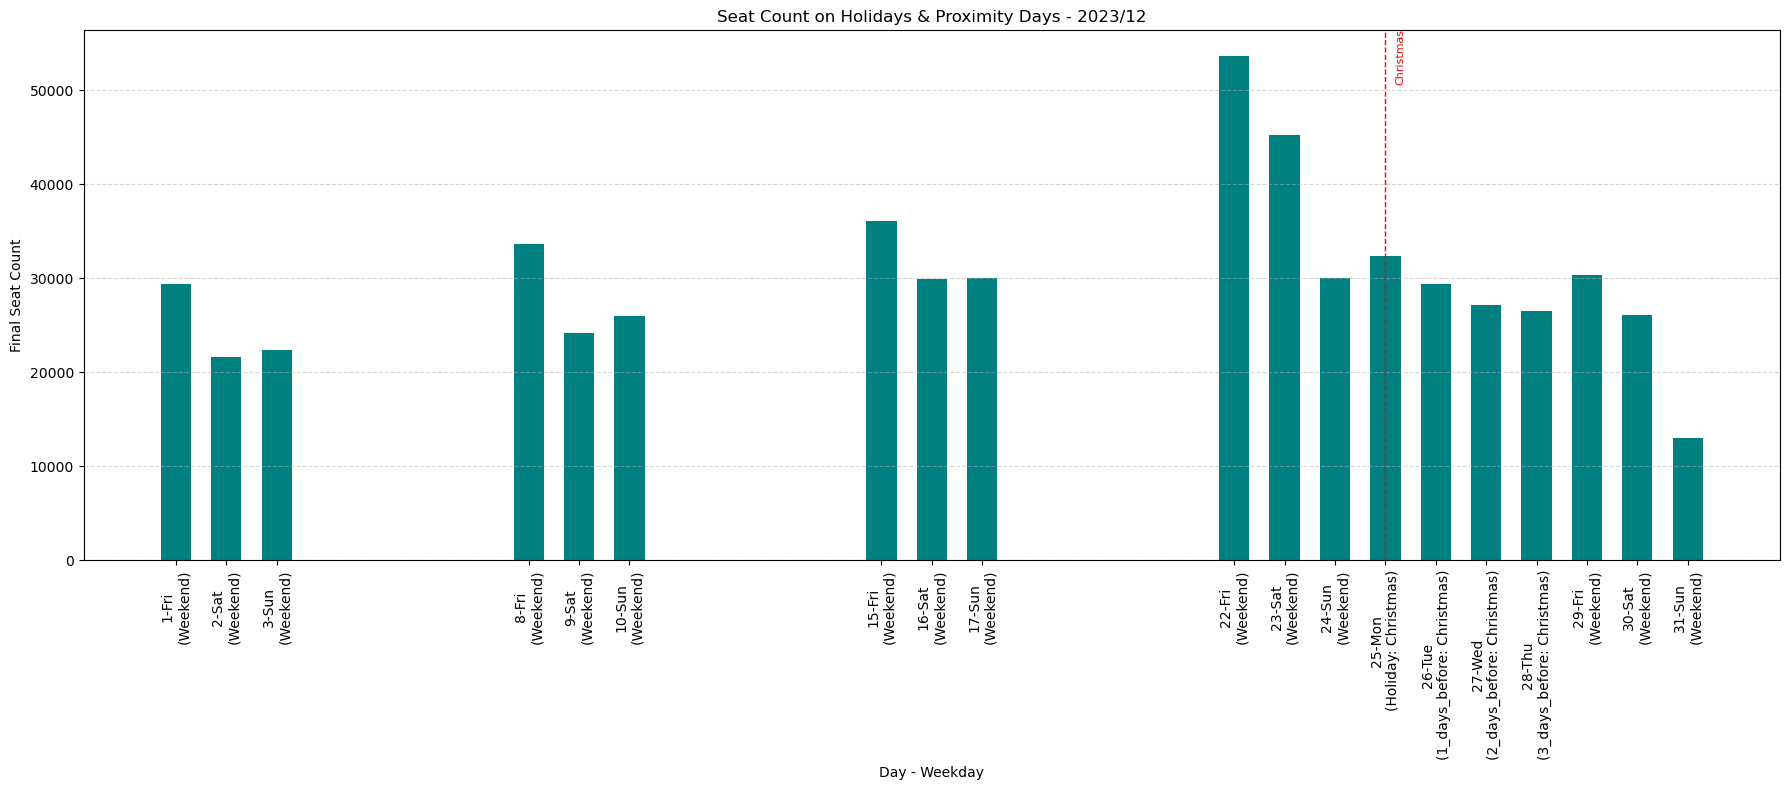

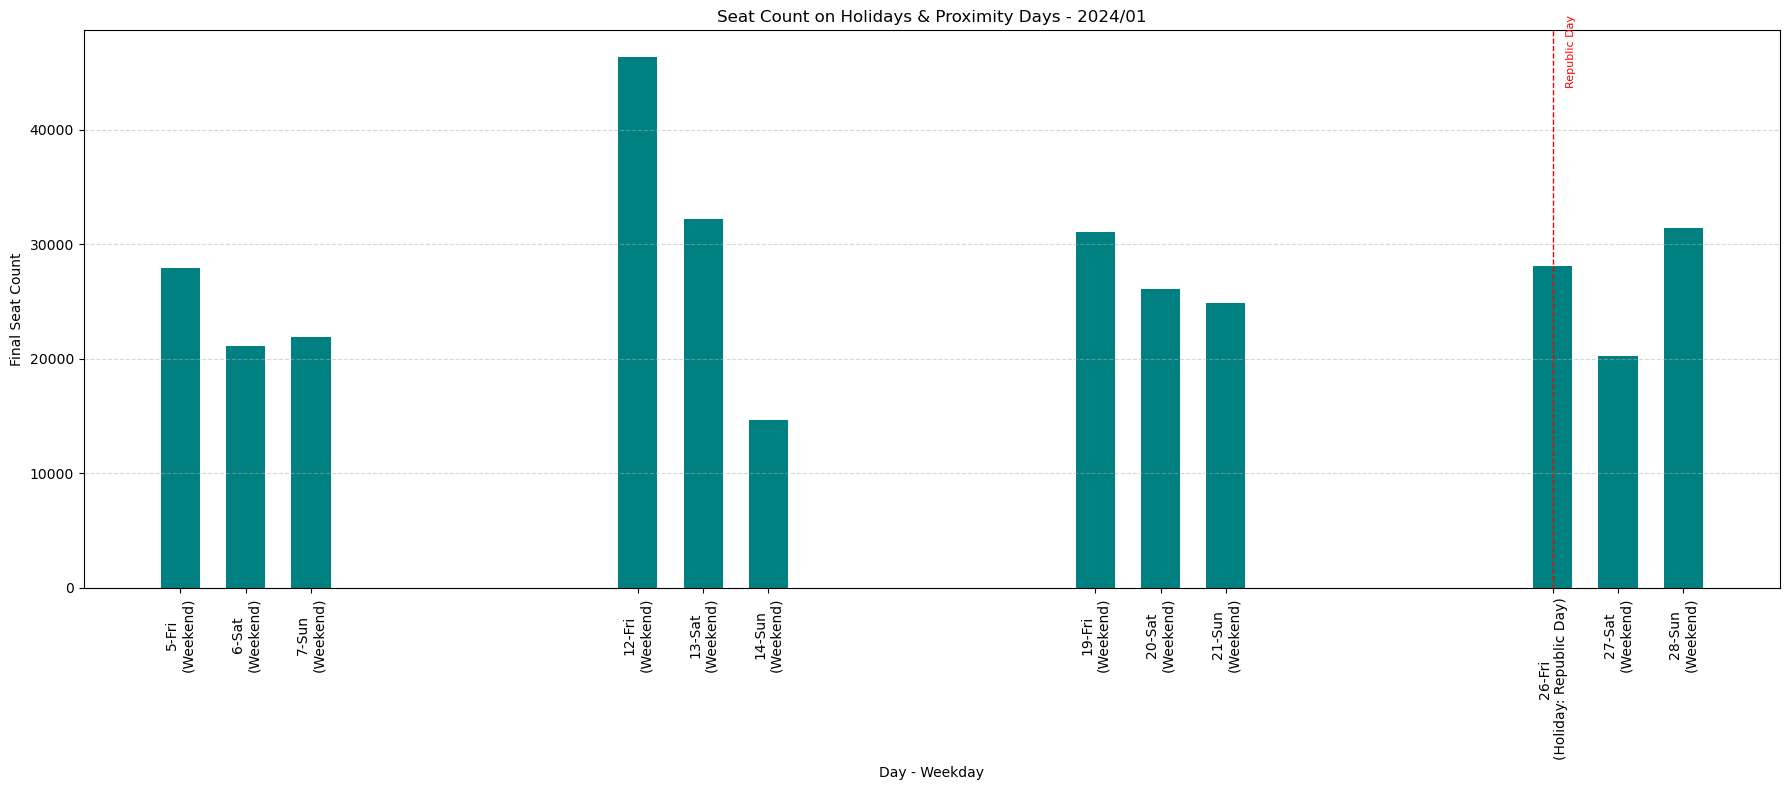

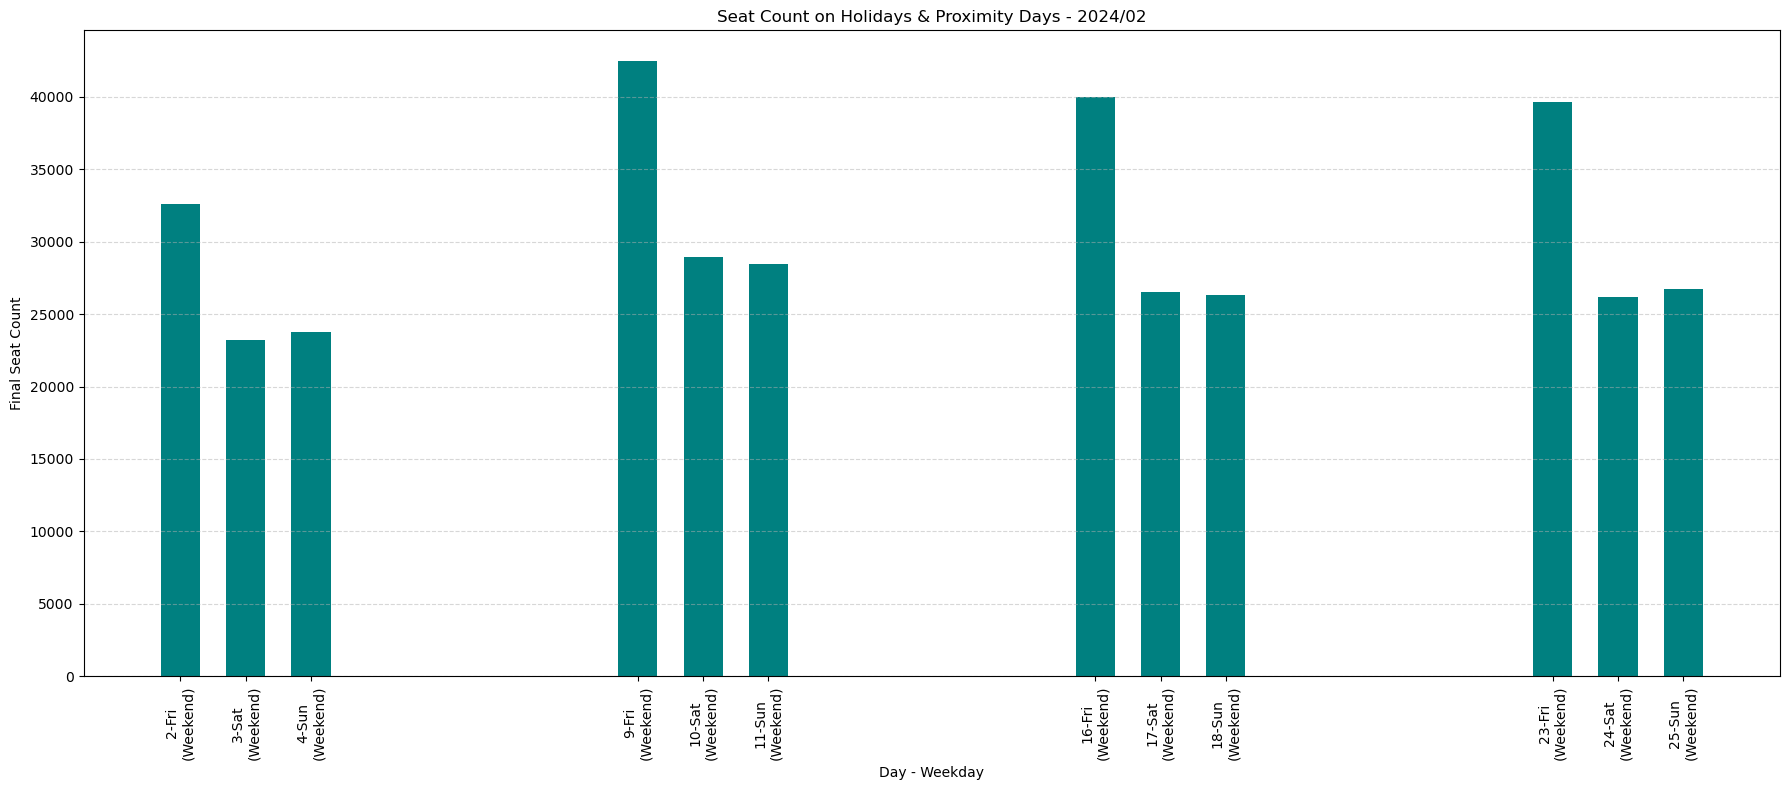

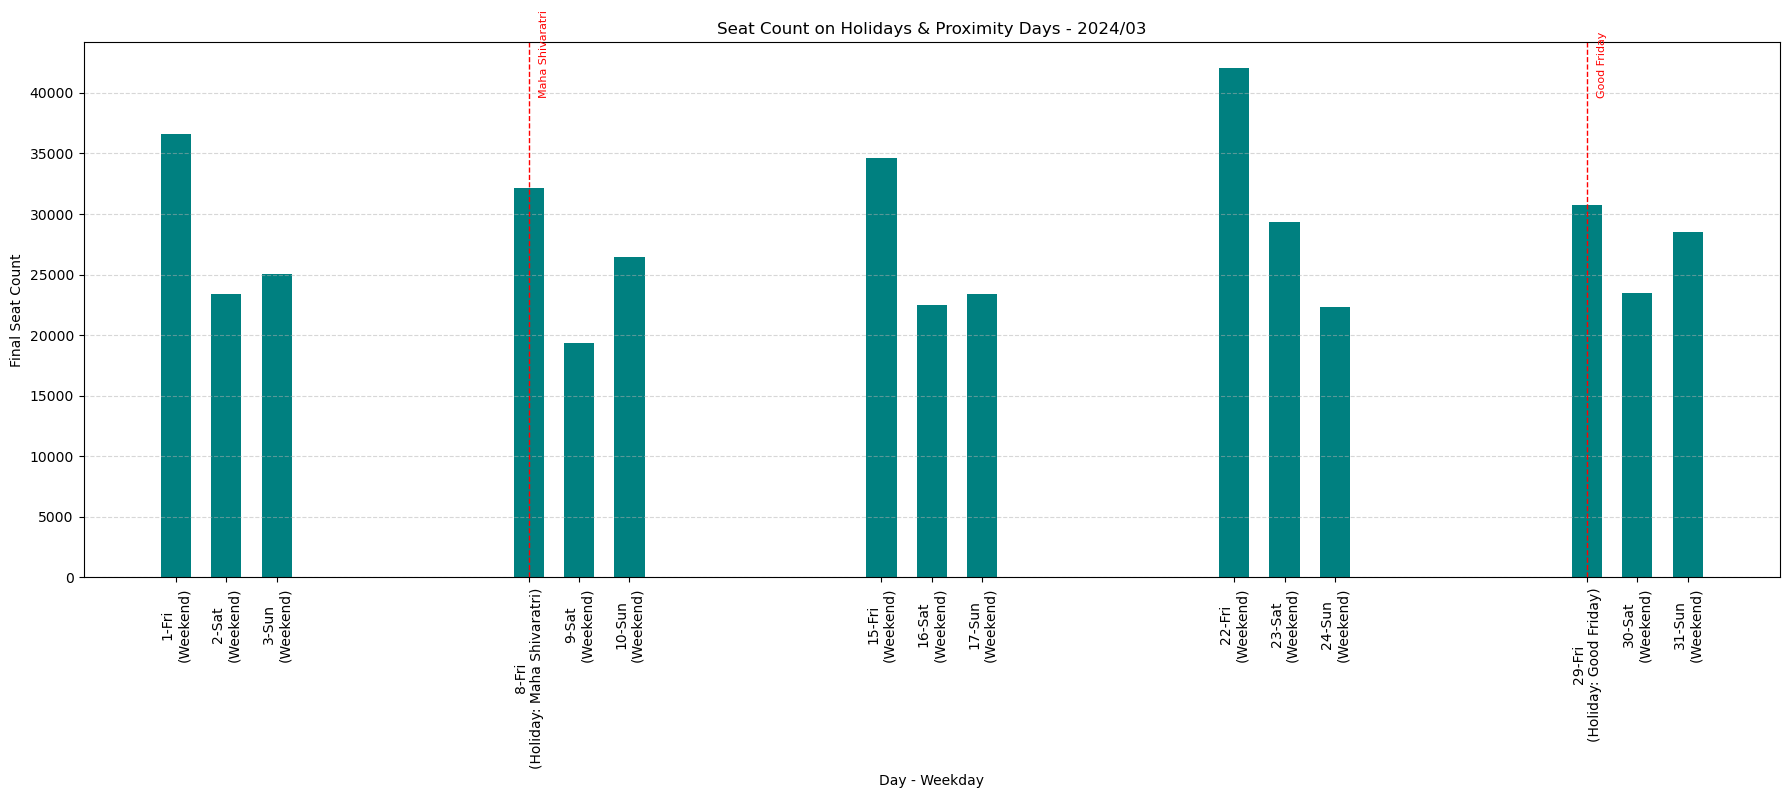

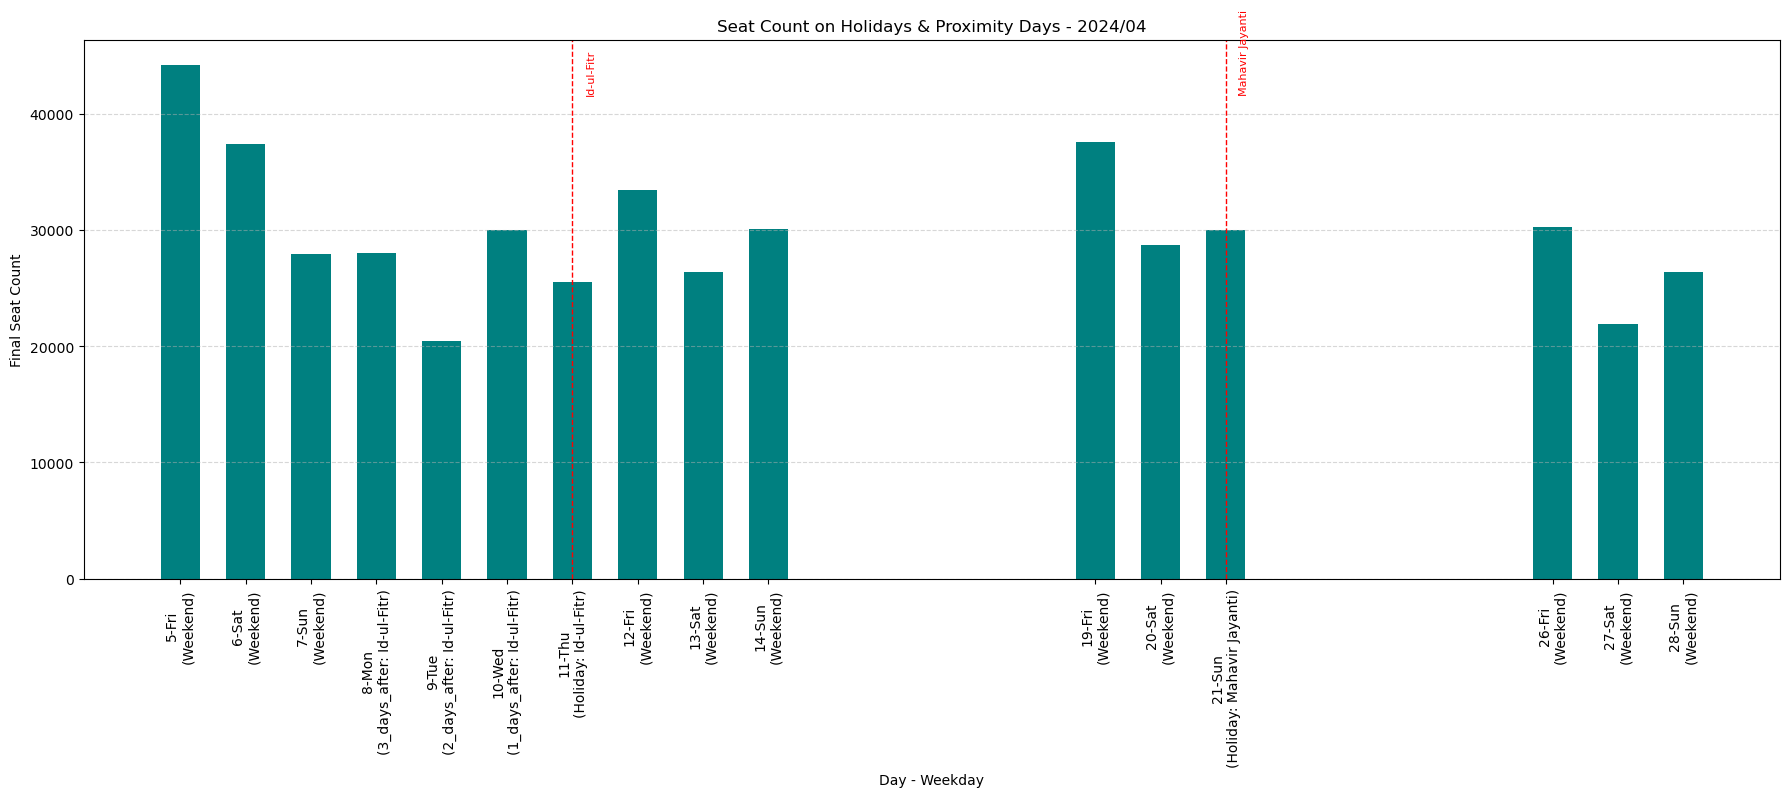

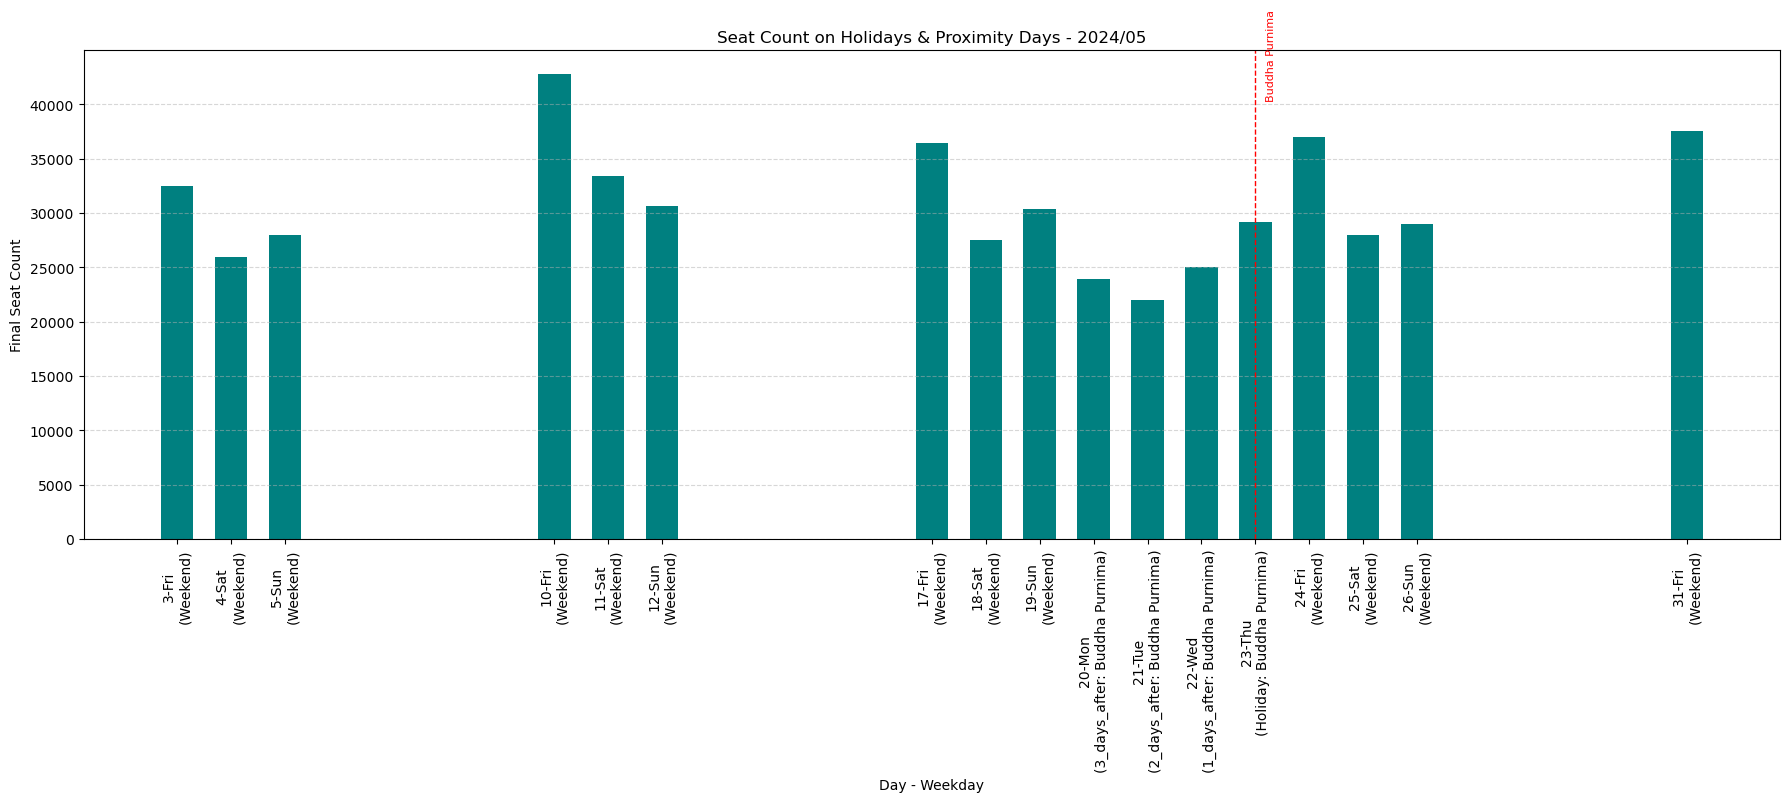

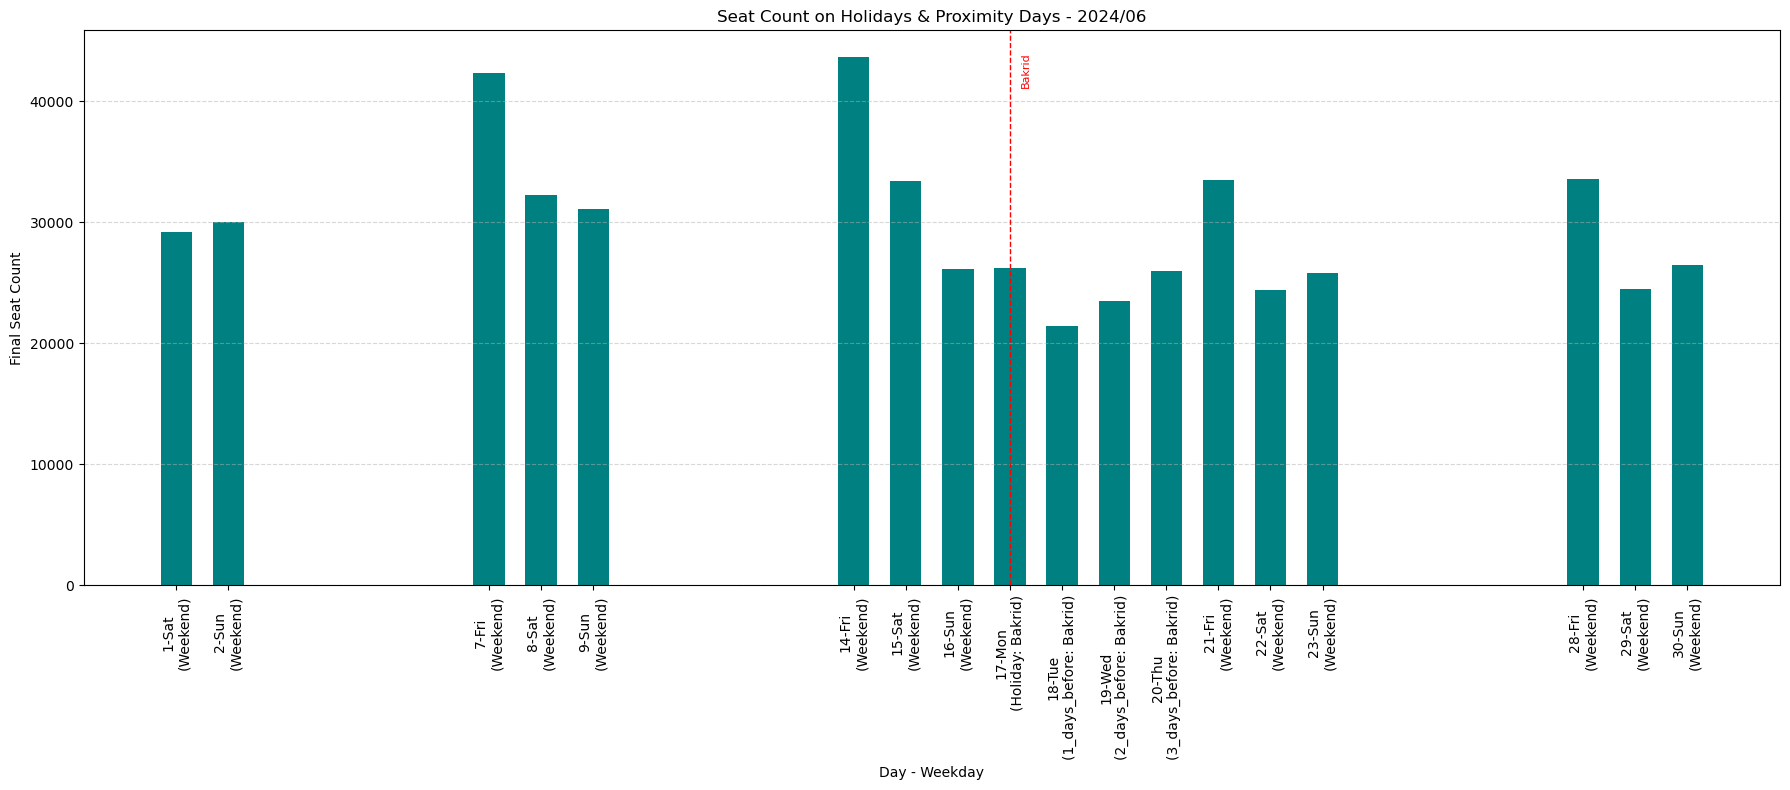

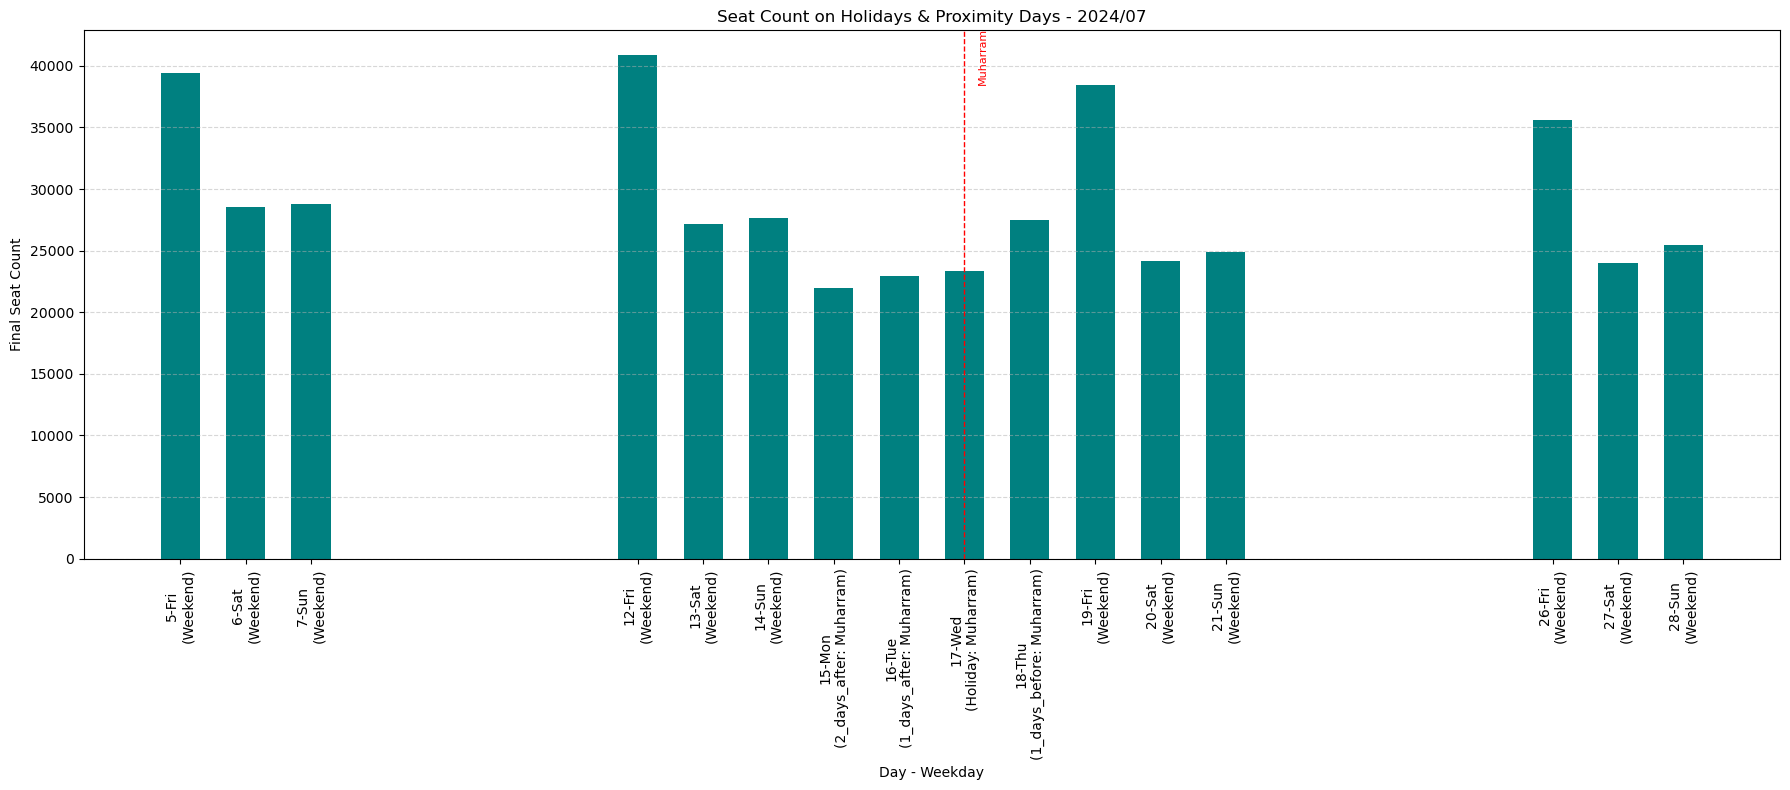

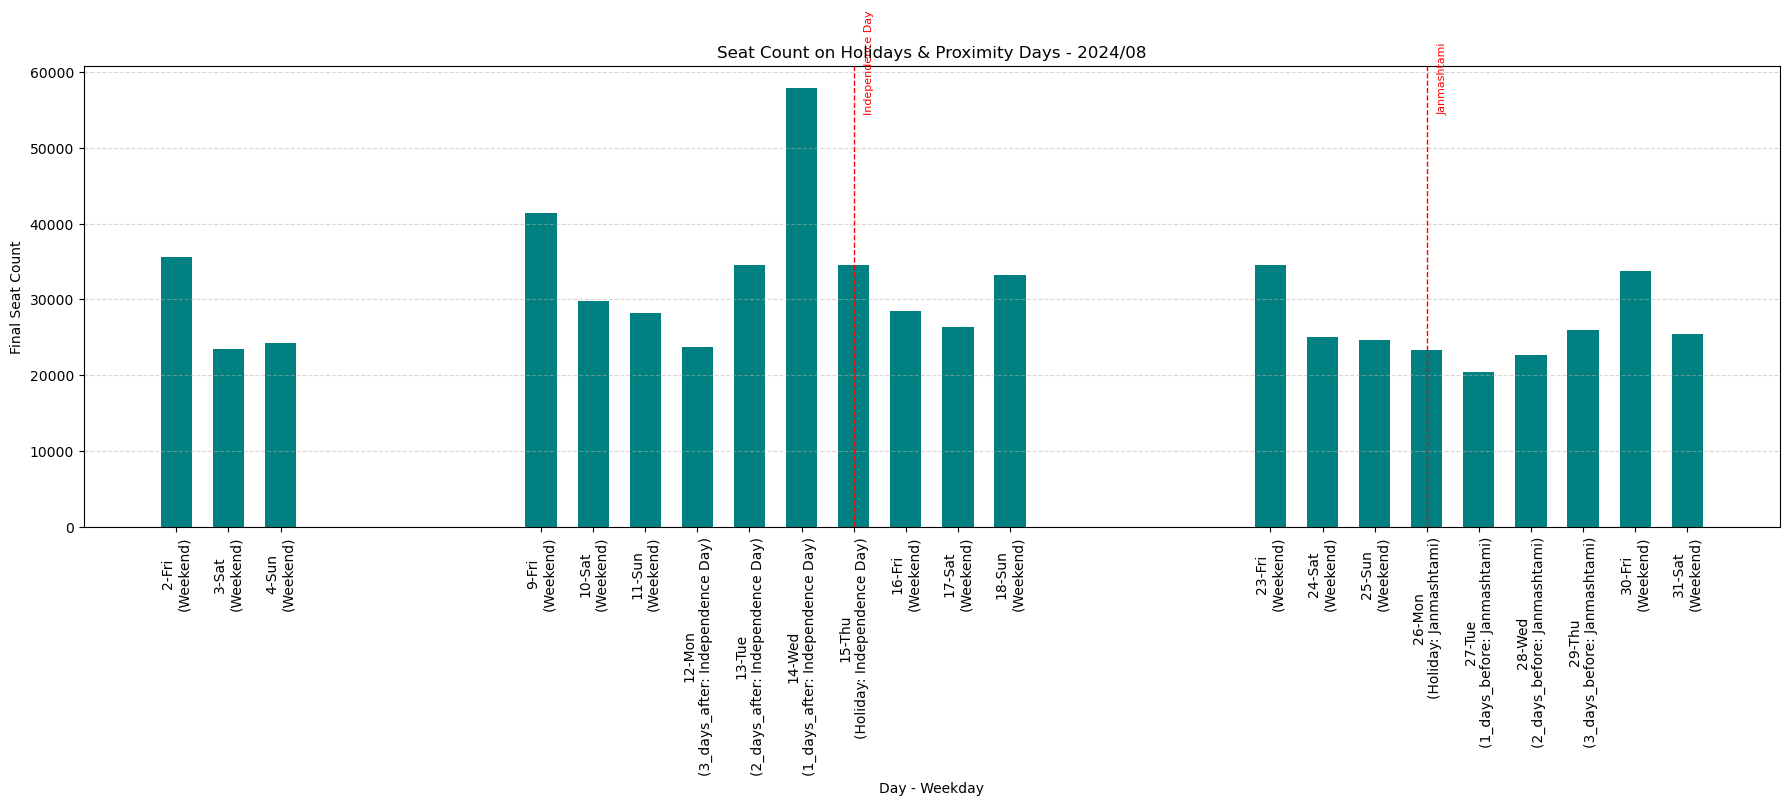

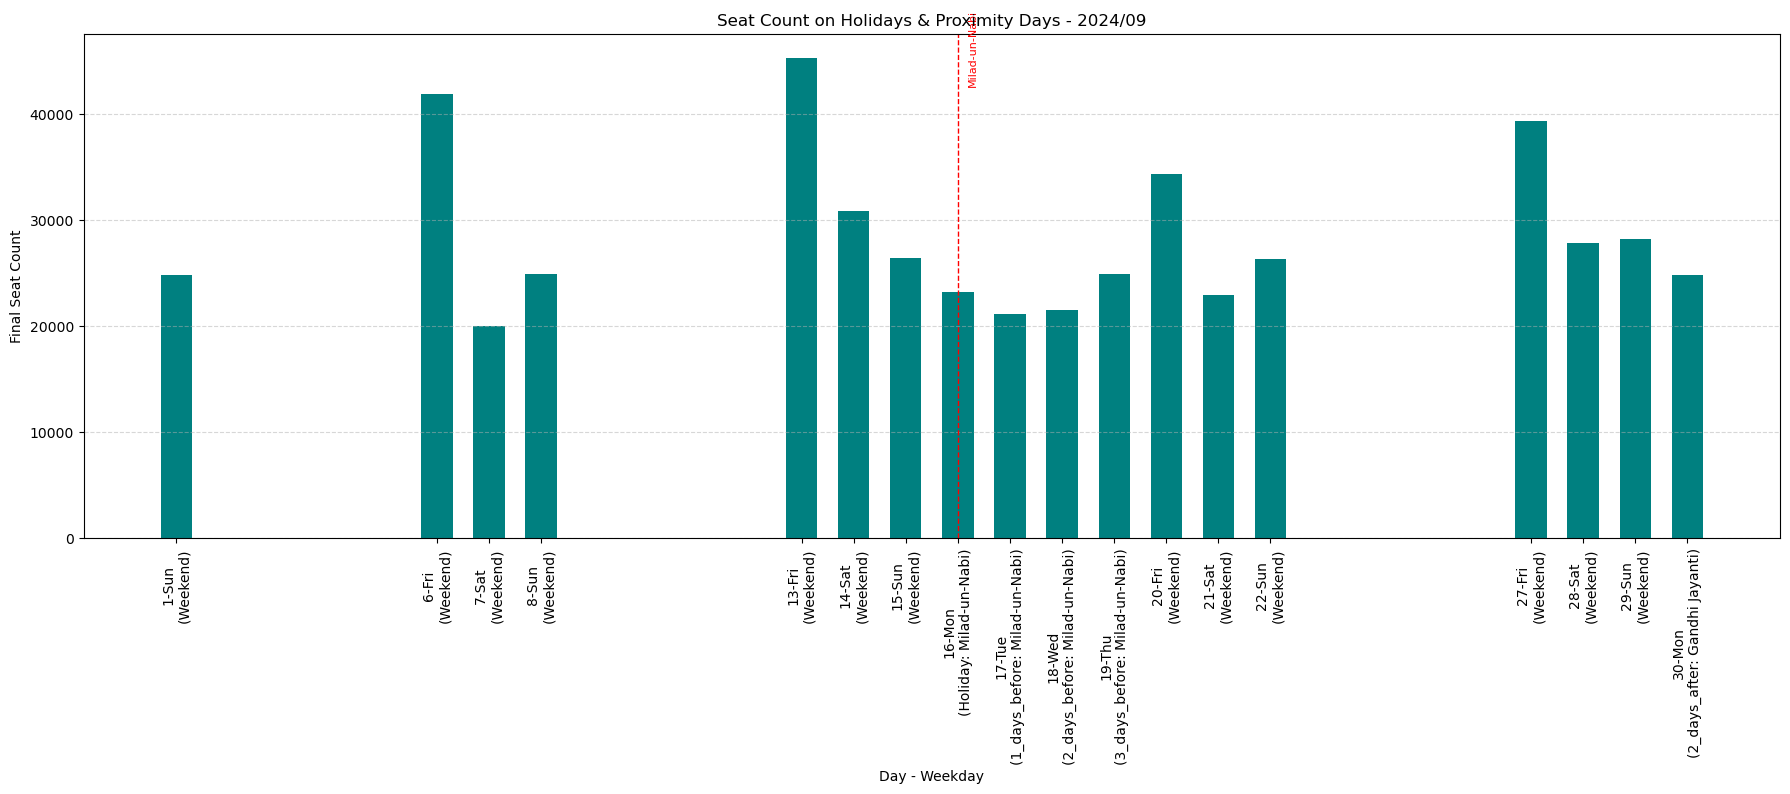

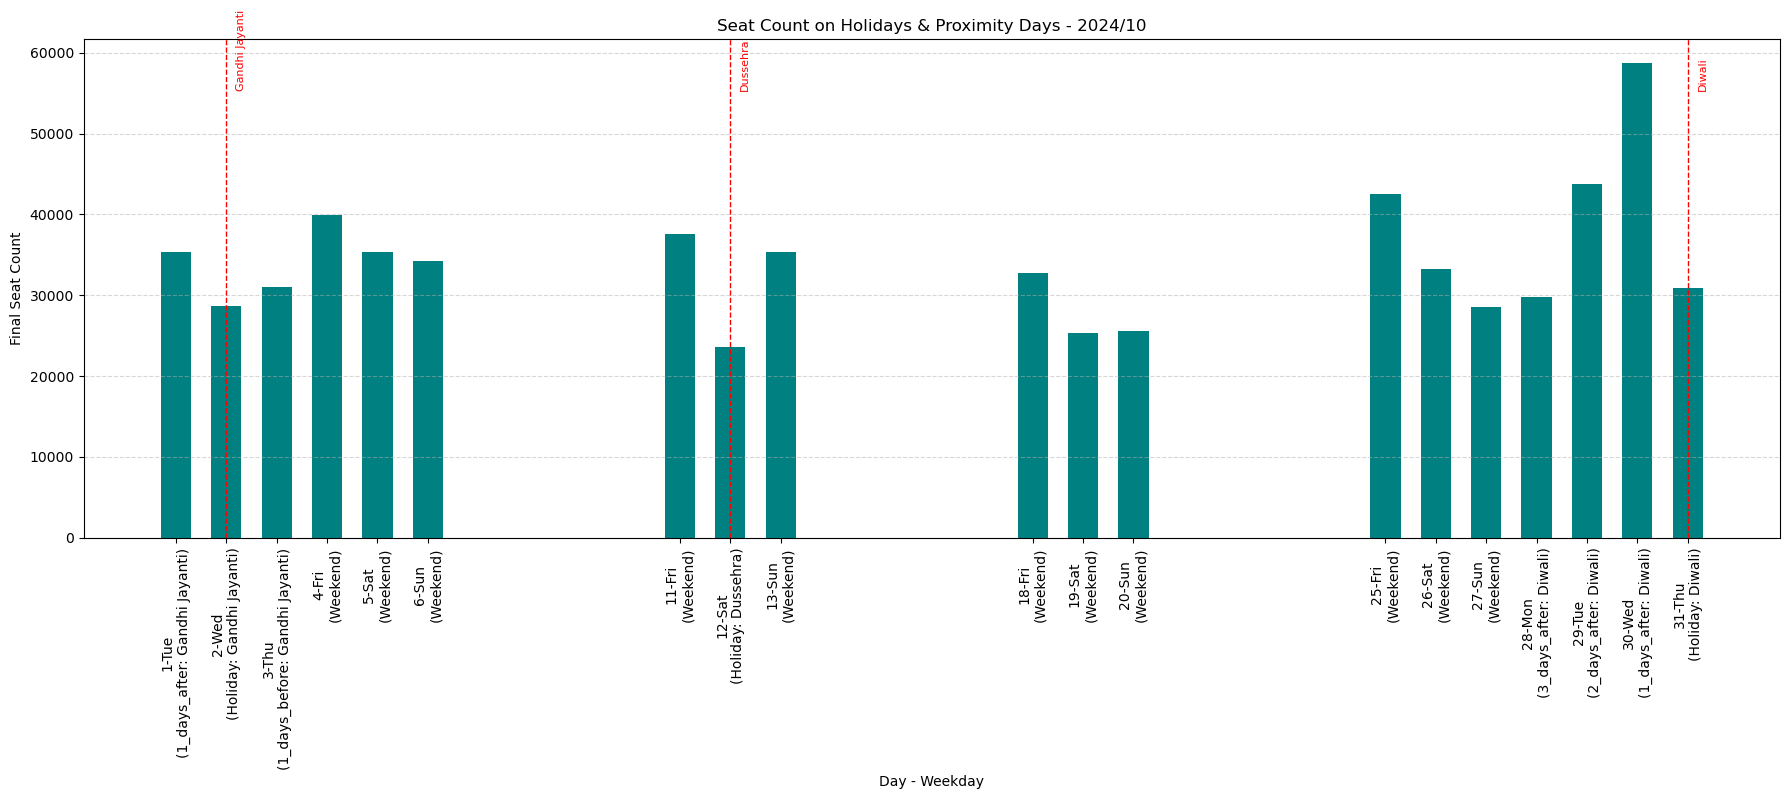

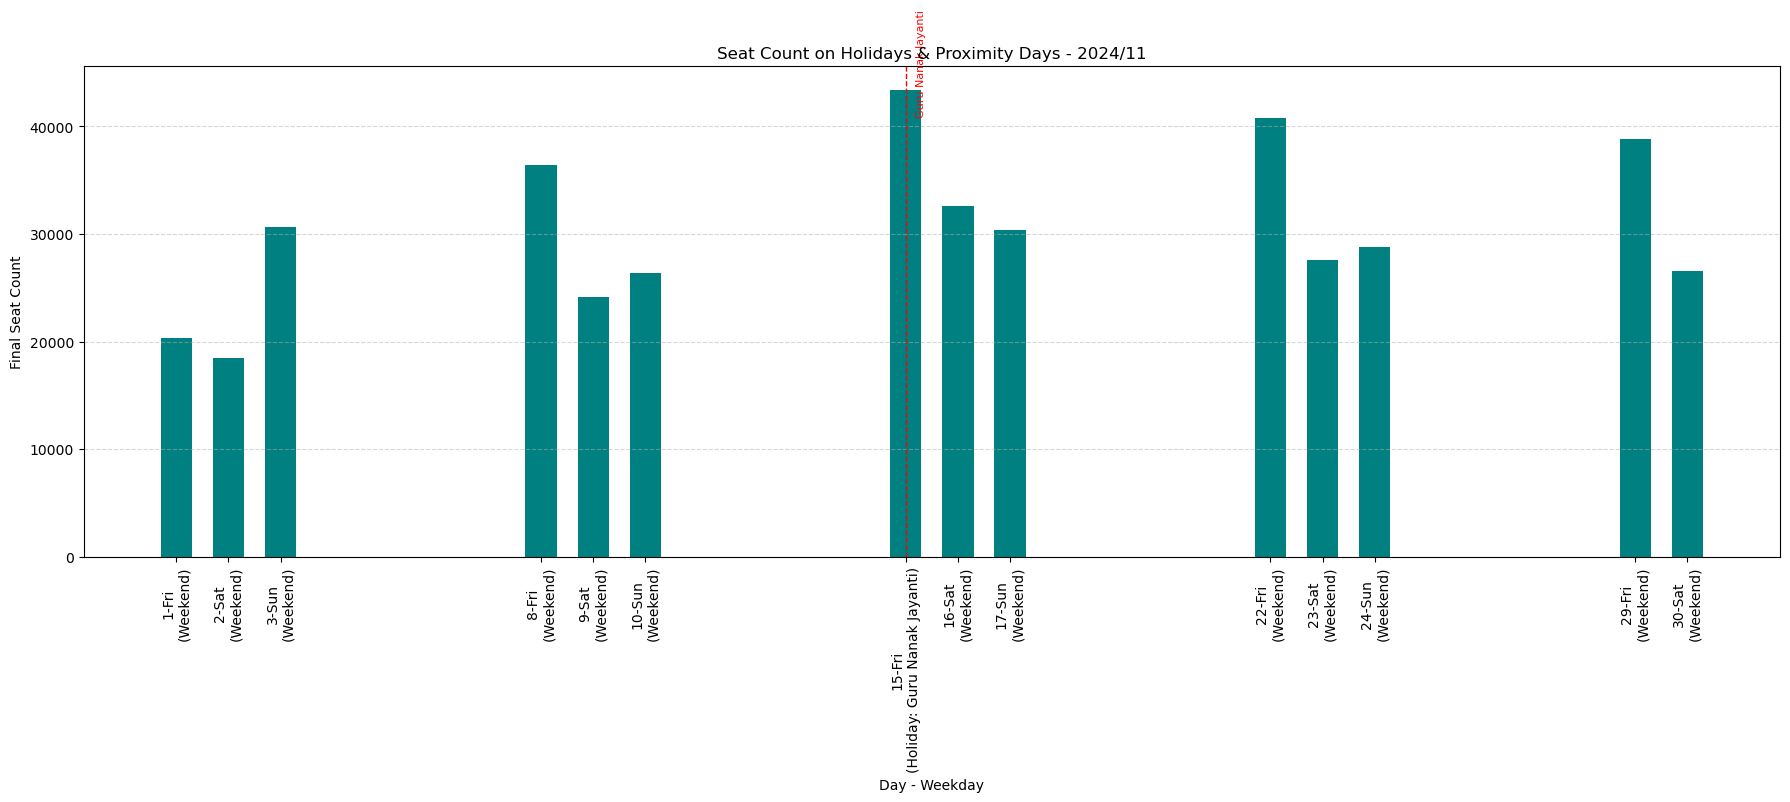

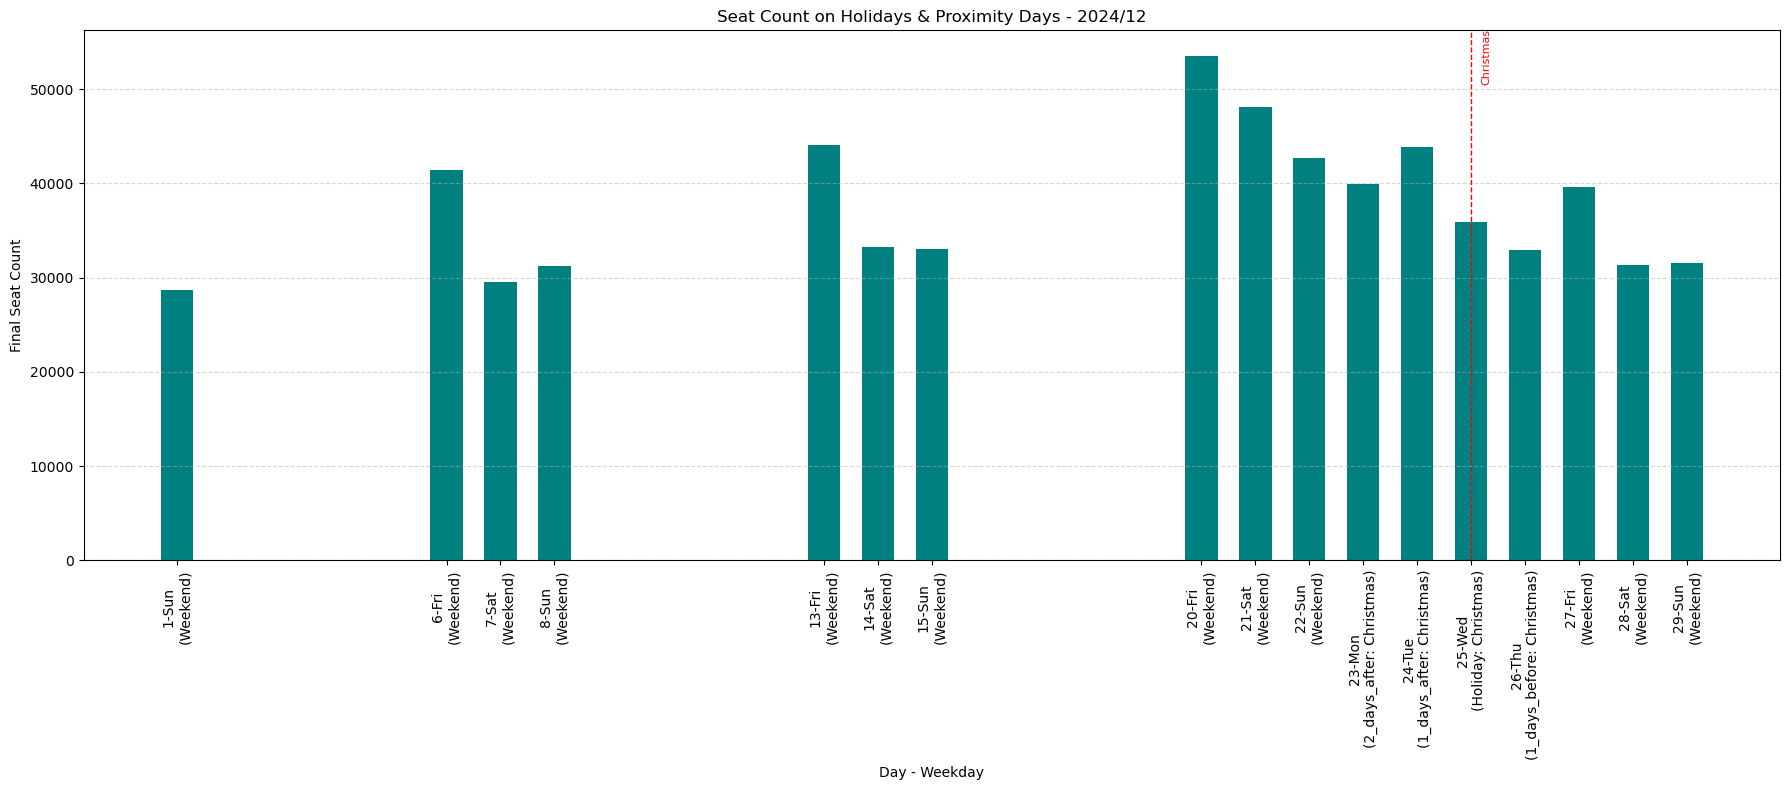

In [33]:
# Filter sample route for visualization (update srcid/destid if needed)
filtered_df = train_combined[train_combined['srcid'] == 45].copy()

# Extract date parts
filtered_df['date'] = pd.to_datetime(filtered_df['doj'])
filtered_df['year'] = filtered_df['date'].dt.year
filtered_df['month'] = filtered_df['date'].dt.month
filtered_df['day'] = filtered_df['date'].dt.day
filtered_df['weekday_name'] = filtered_df['date'].dt.day_name()

# Loop through year and month
for year in filtered_df['year'].unique():
    yearly_df = filtered_df[filtered_df['year'] == year]

    for month in range(1, 13):
        month_df = yearly_df[yearly_df['month'] == month]
        if month_df.empty:
            continue

        daywise = month_df.groupby(['day', 'weekday_name'])['final_seatcount'].sum().reset_index()

        label_df = (
            month_df.groupby('day')['holiday_proximity_label']
            .first()
            .reset_index()
        )
        daywise = pd.merge(daywise, label_df, on='day', how='left')

        # ✅ Filter interesting labels
        def is_target_label(lbl):
            if pd.isna(lbl): return False
            return (
                lbl.startswith('Holiday') or
                lbl.startswith('1_days_') or
                lbl.startswith('2_days_') or
                lbl.startswith('3_days_') or
                lbl == 'Weekend'
            )

        daywise_filtered = daywise[daywise['holiday_proximity_label'].apply(is_target_label)]

        if daywise_filtered.empty:
            continue

        # Optional: holiday markers
        holiday_df = (
            train_combined[
                (train_combined['doj'].dt.year == year) &
                (train_combined['doj'].dt.month == month)
            ][['date_holiday', 'holiday_name']]
            .dropna()
            .drop_duplicates()
        )
        holiday_df['holiday_day'] = holiday_df['date_holiday'].dt.day

        # ✅ Plot
        plt.figure(figsize=(18, 8))
        plt.bar(
            daywise_filtered['day'],
            daywise_filtered['final_seatcount'],
            width=0.6,
            color='teal'
        )
        plt.title(f"Seat Count on Holidays & Proximity Days - {year}/{month:02d}")
        plt.xlabel('Day - Weekday')
        plt.ylabel('Final Seat Count')

        xtick_labels = [
            f"{d}-{w[:3]}\n({lbl})"
            for d, w, lbl in zip(daywise_filtered['day'], daywise_filtered['weekday_name'], daywise_filtered['holiday_proximity_label'])
        ]
        plt.xticks(daywise_filtered['day'], xtick_labels, rotation=90)

        plt.grid(axis='y', linestyle='--', alpha=0.5)

        # Red holiday marker lines
        for _, row in holiday_df.iterrows():
            day = row['holiday_day']
            name = row['holiday_name']
            plt.axvline(x=day, color='red', linestyle='--', linewidth=1)
            plt.text(day + 0.2, plt.ylim()[1] * 0.9, name, rotation=90, color='red', fontsize=8)

        plt.tight_layout()
        plt.show()


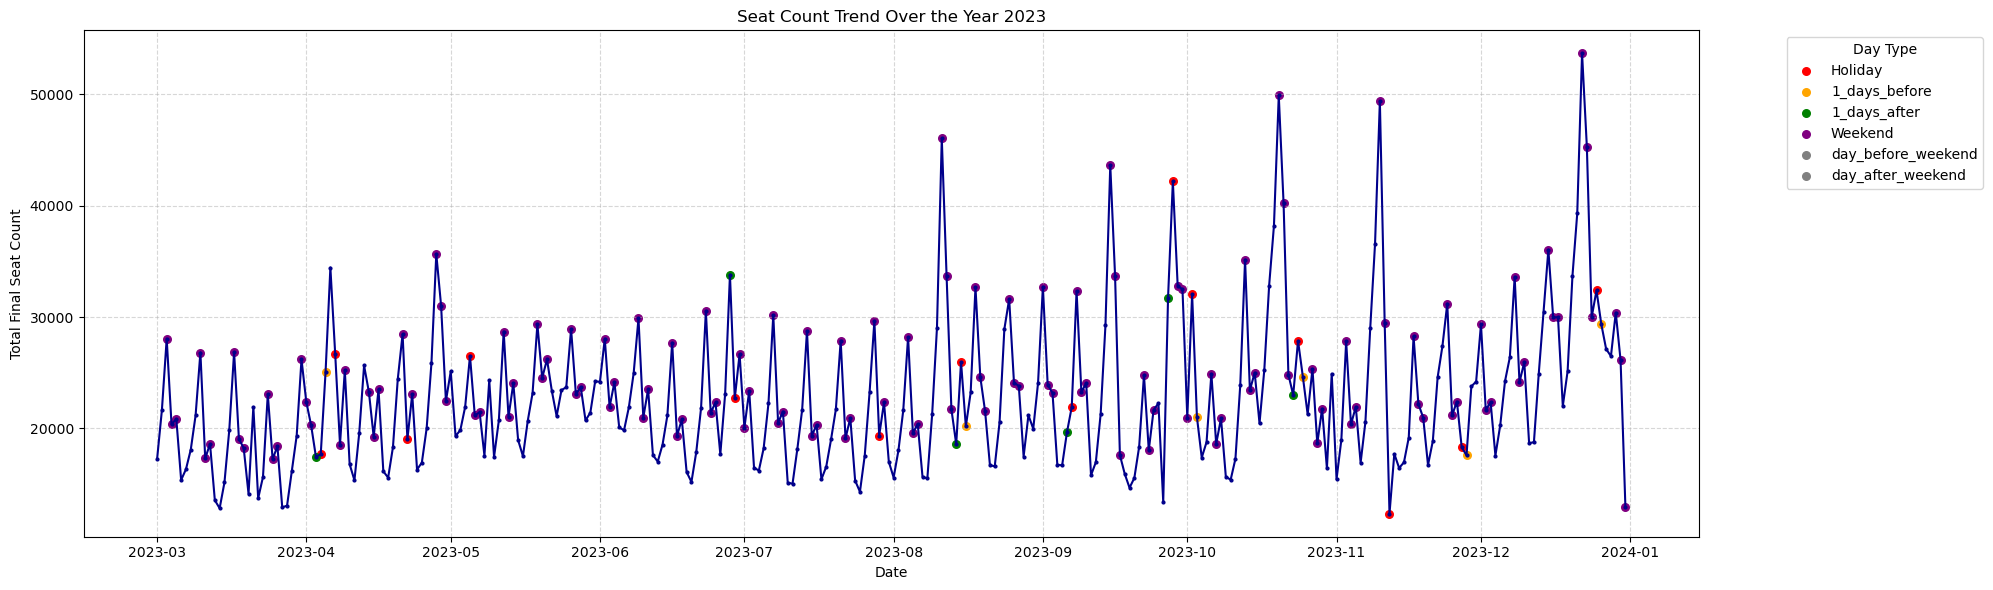

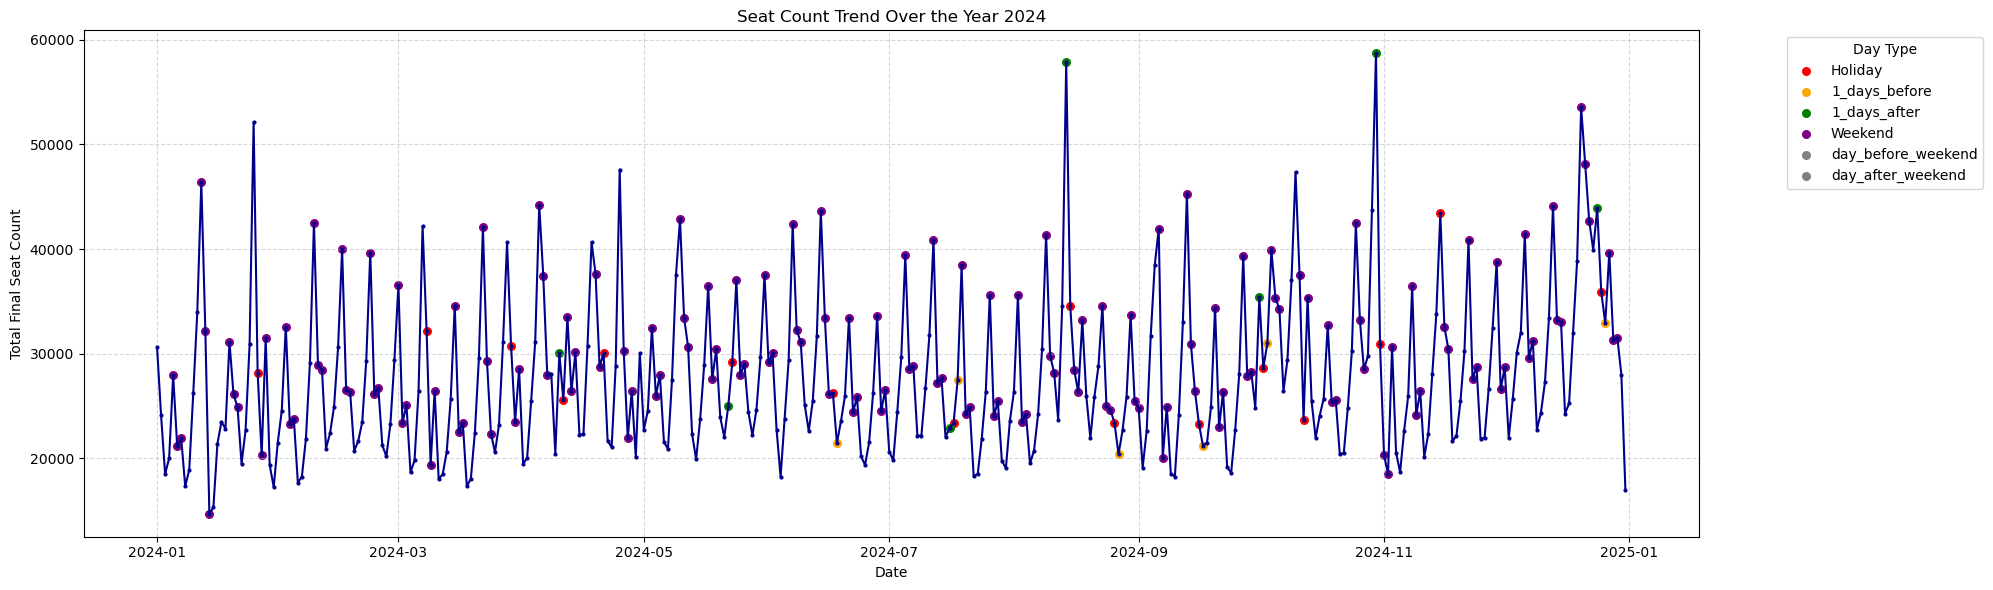

In [34]:
for year in filtered_df['year'].unique():
    yearly_df = filtered_df[filtered_df['year'] == year].copy()
    
    # Sort by date
    yearly_df = yearly_df.sort_values('doj')
    
    # Aggregate total seat count per date
    daily_df = (
        yearly_df.groupby(['doj', 'holiday_proximity_label'])['final_seatcount']
        .sum()
        .reset_index()
    )

    # Plot
    plt.figure(figsize=(20, 6))
    plt.plot(daily_df['doj'], daily_df['final_seatcount'], color='darkblue', marker='o', markersize=2)
    plt.title(f"Seat Count Trend Over the Year {year}")
    plt.xlabel("Date")
    plt.ylabel("Total Final Seat Count")
    plt.grid(True, linestyle='--', alpha=0.5)

    # Highlight holidays and proximity with scatter markers
    for label_type, color in {
        "Holiday": "red",
        "1_days_before": "orange",
        "1_days_after": "green",
        "Weekend": "purple",
        "day_before_weekend": "gray",
        "day_after_weekend": "gray"
    }.items():
        subset = daily_df[daily_df['holiday_proximity_label'].str.contains(label_type, na=False)]
        plt.scatter(subset['doj'], subset['final_seatcount'], color=color, label=label_type, s=30)

    plt.legend(title="Day Type", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


In [35]:
print(train_combined)

             doj  srcid  destid  final_seatcount date_holiday holiday_name  \
0     2023-03-01     45      46           2838.0          NaT          NaN   
1     2023-03-01     46      45           2298.0          NaT          NaN   
2     2023-03-01     45      47           2720.0          NaT          NaN   
3     2023-03-01     47      45           2580.0          NaT          NaN   
4     2023-03-01     46       9           4185.0          NaT          NaN   
...          ...    ...     ...              ...          ...          ...   
67195 2024-12-31      2      24            800.0          NaT          NaN   
67196 2024-12-31     44      45           1360.0          NaT          NaN   
67197 2024-12-31     47      10            560.0          NaT          NaN   
67198 2024-12-31     38      36            535.0          NaT          NaN   
67199 2024-12-31     19      30           2040.0          NaT          NaN   

      weekday_name        date holiday_proximity_label  holiday

In [36]:
train_combined.describe()
train_combined.isnull().sum()
train_combined.corr(numeric_only=True)

,srcid,destid,final_seatcount,holiday_proximity_code
srcid,1.000000e+00,-2.447307e-02,0.125972,-1.484437e-16
destid,-2.447307e-02,1.000000e+00,0.129146,5.942696e-17
final_seatcount,1.259721e-01,1.291462e-01,1.000000,1.150502e-01
holiday_proximity_code,-1.484437e-16,5.942696e-17,0.115050,1.000000e+00


In [37]:
train_transaction = pd.merge(train_combined, transaction, on=['doj', 'srcid', 'destid'], how='left')

In [38]:
# Define mapping
tier_mapping = {
    'Tier 1': 1,
    'Tier2': 2,
    'Tier 3': 3,
    'Tier 4': 4
}

# Apply mapping to both columns
train_transaction['destid_tier_int'] = train_transaction['destid_tier'].map(tier_mapping)
train_transaction['srcid_tier_int'] = train_transaction['srcid_tier'].map(tier_mapping)


In [39]:
train_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083200 entries, 0 to 2083199
Data columns (total 20 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   doj                      datetime64[ns]
 1   srcid                    int64         
 2   destid                   int64         
 3   final_seatcount          float64       
 4   date_holiday             datetime64[ns]
 5   holiday_name             object        
 6   weekday_name             object        
 7   date                     object        
 8   holiday_proximity_label  object        
 9   holiday_proximity_code   int64         
 10  doi                      datetime64[ns]
 11  srcid_region             object        
 12  destid_region            object        
 13  srcid_tier               object        
 14  destid_tier              object        
 15  cumsum_seatcount         float64       
 16  cumsum_searchcount       float64       
 17  dbd                      in

In [40]:
# Ensure 'doj' column is in datetime format
train_transaction['doj'] = pd.to_datetime(train_transaction['doj'])

# Extract month in 2-digit format
train_transaction['month'] = train_transaction['doj'].dt.month


In [41]:
# Convert the column to datetime format
train_transaction['date'] = pd.to_datetime(train_transaction['date'])

# Format it as YYYYMMDD and convert to integer
train_transaction['date'] = train_transaction['date'].dt.strftime('%Y%m%d').astype(int)


In [42]:
print(train_transaction)

               doj  srcid  destid  final_seatcount date_holiday holiday_name  \
0       2023-03-01     45      46           2838.0          NaT          NaN   
1       2023-03-01     45      46           2838.0          NaT          NaN   
2       2023-03-01     45      46           2838.0          NaT          NaN   
3       2023-03-01     45      46           2838.0          NaT          NaN   
4       2023-03-01     45      46           2838.0          NaT          NaN   
...            ...    ...     ...              ...          ...          ...   
2083195 2024-12-31     19      30           2040.0          NaT          NaN   
2083196 2024-12-31     19      30           2040.0          NaT          NaN   
2083197 2024-12-31     19      30           2040.0          NaT          NaN   
2083198 2024-12-31     19      30           2040.0          NaT          NaN   
2083199 2024-12-31     19      30           2040.0          NaT          NaN   

        weekday_name      date holiday_

In [43]:
train_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083200 entries, 0 to 2083199
Data columns (total 21 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   doj                      datetime64[ns]
 1   srcid                    int64         
 2   destid                   int64         
 3   final_seatcount          float64       
 4   date_holiday             datetime64[ns]
 5   holiday_name             object        
 6   weekday_name             object        
 7   date                     int64         
 8   holiday_proximity_label  object        
 9   holiday_proximity_code   int64         
 10  doi                      datetime64[ns]
 11  srcid_region             object        
 12  destid_region            object        
 13  srcid_tier               object        
 14  destid_tier              object        
 15  cumsum_seatcount         float64       
 16  cumsum_searchcount       float64       
 17  dbd                      in

In [44]:
train_transaction.describe()
train_transaction.isnull().sum()
train_transaction.corr(numeric_only=True)

,srcid,destid,final_seatcount,date,holiday_proximity_code,cumsum_seatcount,cumsum_searchcount,dbd,destid_tier_int,srcid_tier_int,month
srcid,1.000000e+00,-2.447307e-02,1.259721e-01,-6.468607e-14,1.399478e-15,0.037103,0.033388,7.897063e-18,2.319387e-01,-2.041492e-01,-2.147559e-14
destid,-2.447307e-02,1.000000e+00,1.291462e-01,-2.920077e-14,-2.341955e-16,0.041117,0.015551,8.432113e-18,-2.017652e-01,2.485286e-01,-8.661357e-15
final_seatcount,1.259721e-01,1.291462e-01,1.000000e+00,1.447543e-01,1.150502e-01,0.305921,0.327329,-5.791383e-15,-8.537328e-02,-1.056655e-01,5.512844e-02
date,-6.468607e-14,-2.920077e-14,1.447543e-01,1.000000e+00,-7.451821e-03,0.026613,0.068380,-2.977672e-14,4.724833e-15,3.410609e-14,-8.728317e-02
holiday_proximity_code,1.399478e-15,-2.341955e-16,1.150502e-01,-7.451821e-03,1.000000e+00,0.031717,0.026559,3.431295e-16,-9.650790e-16,-1.263358e-15,-6.507049e-03
cumsum_seatcount,3.710256e-02,4.111665e-02,3.059211e-01,2.661254e-02,3.171695e-02,1.000000,0.808407,-4.624098e-01,7.637877e-03,-1.682417e-03,2.579293e-02
cumsum_searchcount,3.338833e-02,1.555083e-02,3.273293e-01,6.838041e-02,2.655937e-02,0.808407,1.000000,-3.351946e-01,1.666990e-02,-4.241021e-02,4.735453e-02
dbd,7.897063e-18,8.432113e-18,-5.791383e-15,-2.977672e-14,3.431295e-16,-0.462410,-0.335195,1.000000e+00,-4.900368e-18,-7.089155e-18,-1.257230e-14
destid_tier_int,2.319387e-01,-2.017652e-01,-8.537328e-02,4.724833e-15,-9.650790e-16,0.007638,0.016670,-4.900368e-18,1.000000e+00,-2.790500e-01,5.584629e-15
srcid_tier_int,-2.041492e-01,2.485286e-01,-1.056655e-01,3.410609e-14,-1.263358e-15,-0.001682,-0.042410,-7.089155e-18,-2.790500e-01,1.000000e+00,8.409574e-15


In [45]:
print(train_transaction.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083200 entries, 0 to 2083199
Data columns (total 21 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   doj                      datetime64[ns]
 1   srcid                    int64         
 2   destid                   int64         
 3   final_seatcount          float64       
 4   date_holiday             datetime64[ns]
 5   holiday_name             object        
 6   weekday_name             object        
 7   date                     int64         
 8   holiday_proximity_label  object        
 9   holiday_proximity_code   int64         
 10  doi                      datetime64[ns]
 11  srcid_region             object        
 12  destid_region            object        
 13  srcid_tier               object        
 14  destid_tier              object        
 15  cumsum_seatcount         float64       
 16  cumsum_searchcount       float64       
 17  dbd                      in

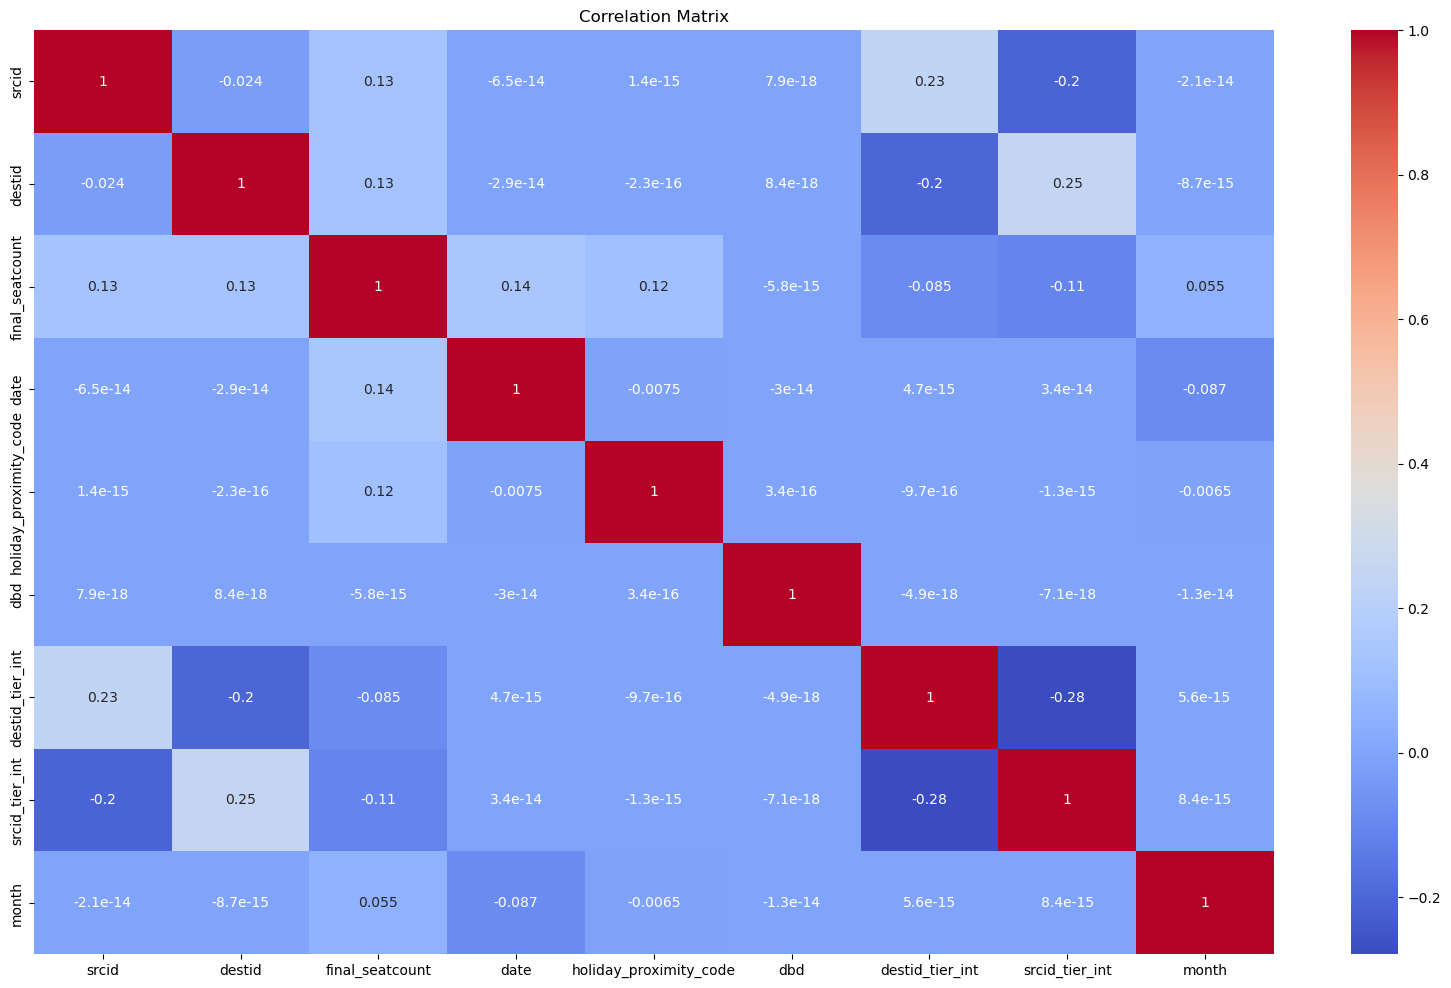

<Axes: title={'center': 'Total Final Seat Count Over Time'}, xlabel='doj'>

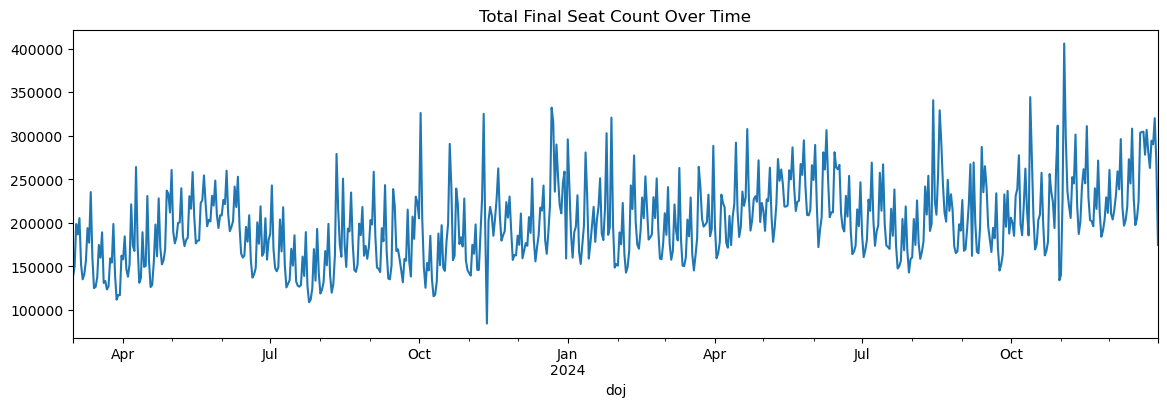

In [46]:
train_transaction = train_transaction.drop(columns=['cumsum_searchcount', 'cumsum_seatcount'])


plt.figure(figsize=(20, 12))
sns.heatmap(train_transaction.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Final seat count over time
train_combined.groupby('doj')['final_seatcount'].sum().plot(figsize=(14, 4), title="Total Final Seat Count Over Time")

In [47]:
external_df = pd.read_csv('test_8gqdJqH.csv')  # or read_excel(), etc.

In [48]:
print(external_df)

             route_key         doj  srcid  destid
0     2025-02-11_46_45  2025-02-11     46      45
1     2025-01-20_17_23  2025-01-20     17      23
2     2025-01-08_02_14  2025-01-08      2      14
3     2025-01-08_08_47  2025-01-08      8      47
4     2025-01-08_09_46  2025-01-08      9      46
...                ...         ...    ...     ...
5895  2025-01-23_46_48  2025-01-23     46      48
5896  2025-02-21_46_09  2025-02-21     46       9
5897  2025-01-17_32_19  2025-01-17     32      19
5898  2025-01-24_45_03  2025-01-24     45       3
5899  2025-01-27_32_19  2025-01-27     32      19

[5900 rows x 4 columns]


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select top features
X = train_transaction[['srcid', 'destid','holiday_proximity_code','destid_tier_int','srcid_tier_int','date','month']]
y = train_transaction['final_seatcount']

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", r2_score(y_test, y_pred))


# Evaluate
print("Model R²:", model.score(X_test, y_test))


RMSE: 205.04452774988604
R² Score: 0.9704156769175458


/Users/company/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


✅ Model R² score on dbd=15: 0.6698


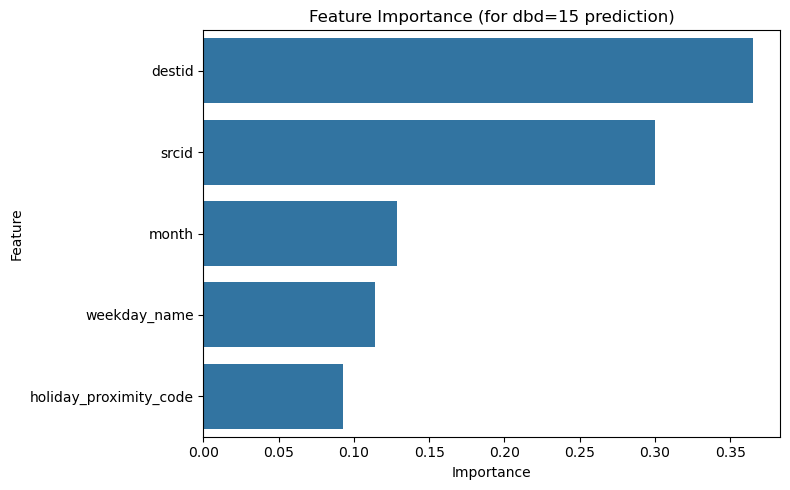

In [50]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------
# Step 1: Filter only dbd = 15
# ------------------------------
df_15 = train_transaction[train_transaction['dbd'] == 15].copy()

# ------------------------------
# Step 2: Select Features
# ------------------------------
features = [
    'month',
    'weekday_name',
    'srcid', 'destid',
    'holiday_proximity_code'
]

# Only keep rows where all features and target are present
df_15 = df_15[features + ['final_seatcount']].dropna()

# ------------------------------
# Step 3: Encode categorical features
# ------------------------------
le = LabelEncoder()
df_15['weekday_name'] = le.fit_transform(df_15['weekday_name'])

# ------------------------------
# Step 4: Define X and y
# ------------------------------
X = df_15[features]
y = df_15['final_seatcount']

# ------------------------------
# Step 5: Train/test split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------------
# Step 6: Train model
# ------------------------------
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ------------------------------
# Step 7: Evaluate model
# ------------------------------
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("✅ Model R² score on dbd=15:", round(r2, 4))

# ------------------------------
# Step 8: Feature Importance (Optional)
# ------------------------------
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importance (for dbd=15 prediction)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
